##Projeto 04: Análise de Dados da Amazon
Este notebook documenta o processo de análise exploratória de dados de produtos e avaliações da Amazon. O objetivo é processar, limpar e preparar os dados para extrair insights valiosos e validar hipóteses.

In [ ]:
# 1. Instala a biblioteca (caso necessário)
!pip install google-cloud-bigquery
!pip install seaborn
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install langdetect
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=96cd3c57fadfa976f303cb64b6b6e48b5556f4cc1e54cc04c8c14f4fc46c15ab
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 4.3 MB/s eta 0:00:00


##4.1 Processar e preparar a base de dados
Nesta seção, o foco é garantir que os dados estejam limpos, consistentes e prontos para a análise.

In [ ]:
# Passo 1: Conectar o Google Colab ao seu Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##4.1.1 Conectar e importar dados
Neste passo, os dois datasets, amazon_product e amazon_review, são carregados no ambiente de trabalho e as primeiras linhas são visualizadas para uma checagem inicial.

In [ ]:
# 4.1.1 🔵 Conectar/importar dados para outras ferramentas
# Passo 2: Carregar o conjunto de dados
import pandas as pd
caminho_product = '/content/drive/MyDrive/curso-laboratoria-Jmx/amazon - amazon_product.csv'
caminho_review = '/content/drive/MyDrive/curso-laboratoria-Jmx/amazon - amazon_review.csv'

df_product = pd.read_csv(caminho_product)
df_review = pd.read_csv(caminho_review)

display(df_product.head())
display(df_review.head())

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,High Compatibility : Compatible With iPhone 12...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,"Compatible with all Type C enabled devices, be..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,【 Fast Charger& Data Sync】-With built-in safet...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,The boAt Deuce USB 300 2 in 1 cable is compati...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,[CHARGE & SYNC FUNCTION]- This cable comes wit...


,user_id,user_name,review_id,review_title,review_content,img_link,product_link,product_id,rating,rating_count
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,B07JW9H4J1,4.2,"24,269"
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,B098NS6PVG,4,"43,994"
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,B096MSW6CT,3.9,"7,928"
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,B08HDJ86NZ,4.2,"94,363"
4,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,B08CF3B7N1,4.2,"16,905"


In [ ]:
df_product.info()
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1469 non-null   object
 1   product_name         1469 non-null   object
 2   category             1469 non-null   object
 3   discounted_price     1469 non-null   object
 4   actual_price         1469 non-null   object
 5   discount_percentage  1469 non-null   object
 6   about_product        1465 non-null   object
dtypes: object(7)
memory usage: 80.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         1465 non-null   object
 1   user_name       1465 non-null   object
 2   review_id       1465 non-null   object
 3   review_title    1465 non-null   object
 4   review_content  1465 non-null   obje

##4.1.7 🔵 Verificar e Alterar o Tipo de Dados
Por sugestão do gemini, faremos essa etapa antes do tratamento dos outliers e merge das tabelas.

Esta é uma etapa crucial que garante que todas as colunas estejam com o tipo de dado correto, permitindo que análises numéricas e estatísticas sejam realizadas sem erros.

Colunas de preço, porcentagem de desconto e avaliações são convertidas para o tipo float.

Valores não numéricos são tratados e convertidos para NaN antes de serem preenchidos.

In [ ]:
# 4.1.7 🔵 Verificar e Alterar o Tipo de Dados
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np

# Supondo que seus DataFrames 'df_product' e 'df_review' já foram carregados

print("--- Realizando a Conversão de Tipos de Dados em Ambas as Tabelas ---")
print("-" * 60)

# Colocar os DataFrames em um dicionário para iterar sobre eles
dataframes = {'df_product': df_product, 'df_review': df_review}

for nome, df in dataframes.items():
    print(f"Iniciando a conversão de tipos para: {nome}")

    # Processar colunas de preço (apenas em df_product)
    if nome == 'df_product':
        # discounted_price
        if df_product['discounted_price'].dtype != 'object':
            df_product['discounted_price'] = df_product['discounted_price'].astype(str)
        df_product['discounted_price'] = pd.to_numeric(
            df_product['discounted_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False),
            errors='coerce'
        )

        # actual_price
        if df_product['actual_price'].dtype != 'object':
            df_product['actual_price'] = df_product['actual_price'].astype(str)
        df_product['actual_price'] = pd.to_numeric(
            df_product['actual_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False),
            errors='coerce'
        )

        # discount_percentage
        if df_product['discount_percentage'].dtype != 'object':
            df_product['discount_percentage'] = df_product['discount_percentage'].astype(str)
        df_product['discount_percentage'] = pd.to_numeric(
            df_product['discount_percentage'].str.replace('%', '', regex=False),
            errors='coerce'
        )

    # Processar colunas de avaliação (apenas em df_review)
    elif nome == 'df_review':
        # rating
        df_review['rating'] = pd.to_numeric(df['rating'], errors='coerce')

        # rating_count
        if df_review['rating_count'].dtype != 'object':
            df_review['rating_count'] = df_review['rating_count'].astype(str)
        df_review['rating_count'] = pd.to_numeric(
            df_review['rating_count'].str.replace(',', '', regex=False),
            errors='coerce'
        )

    print(f"\nVerificação de tipos de dados para {nome}:")
    print(df.info())
    print("-" * 60)

# Reatribuir os DataFrames originais após o loop
df_product = dataframes['df_product']
df_review = dataframes['df_review']

print("Conversão de tipos de dados concluída com sucesso!")
print(f"Total de valores nulos após conversão:")
print(f"df_product - discounted_price: {df_product['discounted_price'].isnull().sum()}")
print(f"df_product - actual_price: {df_product['actual_price'].isnull().sum()}")
print(f"df_product - discount_percentage: {df_product['discount_percentage'].isnull().sum()}")
print(f"df_review - rating: {df_review['rating'].isnull().sum()}")
print(f"df_review - rating_count: {df_review['rating_count'].isnull().sum()}")

--- Realizando a Conversão de Tipos de Dados em Ambas as Tabelas ---
------------------------------------------------------------
Iniciando a conversão de tipos para: df_product

Verificação de tipos de dados para df_product:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1469 non-null   object 
 1   product_name         1469 non-null   object 
 2   category             1469 non-null   object 
 3   discounted_price     1469 non-null   float64
 4   actual_price         1469 non-null   float64
 5   discount_percentage  1469 non-null   int64  
 6   about_product        1465 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 80.5+ KB
None
------------------------------------------------------------
Iniciando a conversão de tipos para: df_review

Verificação de tipos de dados para df_rev

##4.1.2 Identificar e tratar valores nulos
Neste passo, os valores nulos foram identificados e tratados para garantir a integridade do dataset.

Para colunas numéricas, os valores ausentes são preenchidos com a média da coluna.

Para colunas categóricas ou de texto, os valores ausentes são preenchidos com a moda (o valor mais frequente) da coluna.

Essa estratégia garante que não haja dados faltantes, permitindo que as análises estatísticas e as visualizações funcionem sem erros.

In [ ]:
# 4.1.2 🔵 Identificar e Tratar Valores Nulos
# Importar a biblioteca pandas
import pandas as pd

# Supondo que seus DataFrames 'df_product' e 'df_review' já foram carregados

# Colocar os DataFrames em uma lista para iterar sobre eles
dataframes = {'df_product': df_product, 'df_review': df_review}

print("--- Identificando e Tratando Valores Nulos em Ambas as Tabelas ---")
print("-" * 60)

for nome, df in dataframes.items():
    print(f"Iniciando tratamento de valores nulos para: {nome}")
    print("Quantidade de valores nulos por coluna antes do tratamento:")
    print(df.isnull().sum())

    print("\nTratando valores nulos...")

    # Identificar colunas numéricas
    colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
    # Identificar colunas de texto/categóricas
    colunas_categoricas = df.select_dtypes(include=['object']).columns

    # Substituir nulos em colunas numéricas pela mediana
    for coluna in colunas_numericas:
        if df[coluna].isnull().sum() > 0:
            mediana = df[coluna].median()
            df[coluna] = df[coluna].fillna(mediana)
            print(f"Valores nulos na coluna '{coluna}' foram preenchidos com a mediana: {mediana:.2f}")

    # Substituir nulos em colunas categóricas pela moda
    for coluna in colunas_categoricas:
        if df[coluna].isnull().sum() > 0:
            moda = df[coluna].mode()[0]
            df[coluna] = df[coluna].fillna(moda)
            print(f"Valores nulos na coluna '{coluna}' foram preenchidos com a moda: '{moda}'")

    print("\nVerificação de valores nulos após o tratamento:")
    print(df.isnull().sum())
    print("-" * 60)

--- Identificando e Tratando Valores Nulos em Ambas as Tabelas ---
------------------------------------------------------------
Iniciando tratamento de valores nulos para: df_product
Quantidade de valores nulos por coluna antes do tratamento:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
about_product          4
dtype: int64

Tratando valores nulos...
Valores nulos na coluna 'about_product' foram preenchidos com a moda: '[CHARGE & SYNC FUNCTION]- This cable comes with charging & Data sync function|[HIGH QUALITY MATERIAL]- TPE + Nylon Material to make sure that the life of the cable is enhanced significantly|[LONG CORD]- The Cable is extra thick 1.2 meter long, optimized for an easy use for your comfort at home or office|[MORE DURABLE]-This cable is unique interms of design and multi-use and is positioned to provide the best comfort and performance while using|[UNIVERSAL COMPATIBILITY

Explicação Detalhada do Código:

df.isnull().sum(): Esta é uma maneira rápida de ver a quantidade de valores nulos em cada coluna do seu DataFrame. O

.isnull() encontra todos os valores nulos, e o .sum() conta quantos True (nulos) existem por coluna.


df.select_dtypes(): Essa função é muito útil para separar as colunas por tipo de dado, o que nos permite tratar colunas numéricas e categóricas de forma diferente.

df[coluna].fillna(media, inplace=True): O método .fillna() substitui os valores nulos. No caso das colunas numéricas, a gente passa a média daquela coluna. O parâmetro inplace=True faz com que a alteração seja salva diretamente no DataFrame original.


df[coluna].mode()[0]: Para colunas categóricas, a melhor abordagem é preencher os nulos com o valor mais frequente (a moda). O

.mode() retorna uma série com os valores mais frequentes e [0] pega o primeiro deles.

##4.1.3 Identificar e tratar valores duplicados
As linhas duplicadas são identificadas e removidas para garantir que cada entrada no dataset seja única, o que previne a distorção dos resultados.

In [ ]:
# 4.1.3 🔵 Identificar e Tratar Valores Duplicados
# Supondo que seus DataFrames 'df_product' e 'df_review' já foram carregados

# Colocar os DataFrames em um dicionário para iterar sobre eles
dataframes = {'df_product': df_product, 'df_review': df_review}

print("--- Identificando e Removendo Valores Duplicados em Ambas as Tabelas ---")
print("-" * 60)

for nome, df in dataframes.items():
    print(f"Iniciando o tratamento de duplicatas para: {nome}")

    # Lógica condicional para o tratamento correto
    if nome == 'df_product':
        # Para df_product, o 'product_id' é o identificador único.
        num_duplicatas = df.duplicated(subset=['product_id']).sum()

        if num_duplicatas > 0:
            df_sem_duplicatas = df.drop_duplicates(subset=['product_id'])
            dataframes[nome] = df_sem_duplicatas
            print(f"Duplicatas removidas com sucesso com base no 'product_id'. {num_duplicatas} linha(s) removida(s).")
            print(f"O dataset agora tem {len(dataframes[nome])} linhas.")
        else:
            print("Nenhuma duplicata significativa encontrada na coluna 'product_id'.")

    else: # df_review
        # 1. Contar o número de valores não nulos por linha
        df['non_null_count'] = df.count(axis=1)

        # 2. Ordenar o DataFrame por 'product_id' e, em seguida, por 'non_null_count' de forma decrescente
        df_sorted = df.sort_values(
            by=['product_id', 'non_null_count'],
            ascending=[True, False])

        # 3. Remover duplicatas, mantendo a linha com a maior contagem de valores preenchidos
        df_sem_duplicatas = df_sorted.drop_duplicates(subset=['product_id'], keep='first')

        # Remover a coluna auxiliar de contagem
        df_sem_duplicatas = df_sem_duplicatas.drop(columns=['non_null_count'])

        # Contar quantas linhas foram removidas
        linhas_removidas = len(df) - len(df_sem_duplicatas)

        if linhas_removidas > 0:
            dataframes[nome] = df_sem_duplicatas
            print(f"Foram encontradas {linhas_removidas} avaliações duplicadas de produtos.")
            print(f"Duplicatas removidas com sucesso. O dataset agora tem {len(dataframes[nome])} linhas, uma por produto.")
        else:
            print("Nenhuma duplicata significativa encontrada para remover na coluna 'product_id'.")

    print("-" * 60)

# Reatribuir os DataFrames originais após o loop
df_product = dataframes['df_product']
df_review = dataframes['df_review']

--- Identificando e Removendo Valores Duplicados em Ambas as Tabelas ---
------------------------------------------------------------
Iniciando o tratamento de duplicatas para: df_product
Duplicatas removidas com sucesso com base no 'product_id'. 118 linha(s) removida(s).
O dataset agora tem 1351 linhas.
------------------------------------------------------------
Iniciando o tratamento de duplicatas para: df_review
Foram encontradas 114 avaliações duplicadas de produtos.
Duplicatas removidas com sucesso. O dataset agora tem 1351 linhas, uma por produto.
------------------------------------------------------------


##4.1.4 Identificar e tratar dados discrepantes em variáveis categóricas
Esta etapa é crucial para a consistência dos seus dados. O objetivo é padronizar os valores de texto para que variações de digitação, maiúsculas/minúsculas ou espaços extras não sejam tratados como categorias diferentes.

O método .str.lower() garante que todos os valores sejam convertidos para letras minúsculas, por exemplo, transformando "Eletrônicos" em "eletrônicos".

O método .str.strip() remove espaços em branco no início e no fim das strings, evitando inconsistências como "eletrônicos" e "eletrônicos ".

Essa padronização automática é aplicada em todas as colunas de texto em ambas as suas tabelas (df_product e df_review), garantindo que a sua análise de categorias seja precisa e confiável.

In [ ]:
# 4.1.4 🔵 Identificar e Tratar Dados Fora do Escopo de Análise

# Supondo que seus DataFrames 'df_product' e 'df_review' já foram carregados e tratados

# Colocar os DataFrames em um dicionário para iterar sobre eles
dataframes = {'df_product': df_product, 'df_review': df_review}

print("--- Identificando e Tratando Discrepâncias Categóricas em Ambas as Tabelas ---")
print("-" * 60)

for nome, df in dataframes.items():
    print(f"Iniciando a padronização de dados para: {nome}")

    # Identificar colunas de texto/categóricas
    colunas_categoricas = df.select_dtypes(include=['object']).columns

    # Aplicar padronização (minúsculas e remoção de espaços)
    for coluna in colunas_categoricas:
        if df[coluna].dtype == 'object':
            df[coluna] = df[coluna].str.lower().str.strip()

    # Mostrar um exemplo de padronização
    if nome == 'df_product':
        print("\nExemplo de padronização na coluna 'category':")
        # Mostrar os valores únicos da coluna 'category'
        print(df['category'].unique()[:5])
    elif nome == 'df_review':
        print("\nExemplo de padronização na coluna 'review_title':")
        # Mostrar os valores únicos da coluna 'review_title'
        print(df['review_title'].unique()[:5])

    print("-" * 60)

# Reatribuir os DataFrames originais após o loop (para garantir que as mudanças sejam salvas)
df_product = dataframes['df_product']
df_review = dataframes['df_review']

--- Identificando e Tratando Discrepâncias Categóricas em Ambas as Tabelas ---
------------------------------------------------------------
Iniciando a padronização de dados para: df_product

Exemplo de padronização na coluna 'category':
['computers&accessories|accessories&peripherals|cables&accessories|cables|usbcables'
 'computers&accessories|networkingdevices|networkadapters|wirelessusbadapters'
 'electronics|hometheater,tv&video|accessories|cables|hdmicables'
 'electronics|hometheater,tv&video|televisions|smarttelevisions'
 'electronics|hometheater,tv&video|accessories|remotecontrols']
------------------------------------------------------------
Iniciando a padronização de dados para: df_review

Exemplo de padronização na coluna 'review_title':
['good tool to use for,brand is always good,overall good and a better experience,it is useful to me.,works well with cpplus dvr,good,its not plug an play u need to install the driver and will support till 2.4 ghz not above that,surveillance 

##4.1.5 Identificar e tratar dados discrepantes em variáveis categóricas
Esta etapa é crucial para a consistência dos seus dados. O objetivo é padronizar os valores de texto para que variações de digitação, maiúsculas/minúsculas ou espaços extras não sejam tratados como categorias diferentes.

Este código garante a limpeza e a consistência dos dados textuais (categóricos) do seu projeto.

Padronização: Ele percorre todas as colunas de texto e as padroniza, convertendo o texto para minúsculas e removendo espaços em branco no início e no fim. Isso garante que categorias com grafias diferentes, mas com o mesmo significado, sejam tratadas como uma só.

Extração da Categoria Principal: Para resolver o problema da coluna category (com valores separados por |), o código extrai a primeira categoria da string e a armazena em uma nova coluna chamada main_category. Isso cria uma variável limpa e pronta para ser usada em suas análises e visualizações

In [ ]:
# 4.1.5 🔵 Identificar e Tratar Dados Discrepantes em Variáveis Categóricas
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np

# Supondo que seus DataFrames 'df_product' e 'df_review' já foram carregados

# Colocar os DataFrames em um dicionário para iterar sobre eles
dataframes = {'df_product': df_product, 'df_review': df_review}

print("--- Identificando e Tratando Discrepâncias Categóricas em Ambas as Tabelas ---")
print("-" * 60)

for nome, df in dataframes.items():
    print(f"Iniciando a padronização de dados para: {nome}")

    # Identificar colunas de texto/categóricas
    colunas_categoricas = df.select_dtypes(include=['object']).columns

    # Aplicar padronização (minúsculas e remoção de espaços)
    for coluna in colunas_categoricas:
        if df[coluna].dtype == 'object':
            df[coluna] = df[coluna].str.lower().str.strip()

    # --- Nova etapa: Criar as colunas 'main_category' e 'produto' a partir de 'category'
    if nome == 'df_product':
        df['main_category'] = df['category'].str.split('|').str[0].str.strip()
        print("\nNova coluna 'main_category' criada a partir da coluna 'category'.")

        # --- Linha de código adicionada para criar a coluna 'produto' ---
        df['produto'] = df['category'].str.split('|').str[-1].str.strip()
        print("Nova coluna 'produto' criada a partir da coluna 'category'.")


    print("Padronização concluída.")

    # Exemplo de verificação de padronização
    if nome == 'df_product':
        print("\nExemplo de valores únicos na nova coluna 'main_category':")
        print(df['main_category'].unique()[:5])
        print("\nExemplo de valores únicos na nova coluna 'produto':")
        print(df['produto'].unique()[:5])
    elif nome == 'df_review':
        print("\nExemplo de valores únicos na coluna 'review_title':")
        print(df['review_title'].unique()[:5])

    print("-" * 60)

# Reatribuir os DataFrames originais após o loop
df_product = dataframes['df_product']
df_review = dataframes['df_review']

--- Identificando e Tratando Discrepâncias Categóricas em Ambas as Tabelas ---
------------------------------------------------------------
Iniciando a padronização de dados para: df_product

Nova coluna 'main_category' criada a partir da coluna 'category'.
Nova coluna 'produto' criada a partir da coluna 'category'.
Padronização concluída.

Exemplo de valores únicos na nova coluna 'main_category':
['computers&accessories' 'electronics' 'musicalinstruments'
 'officeproducts' 'home&kitchen']

Exemplo de valores únicos na nova coluna 'produto':
['usbcables' 'wirelessusbadapters' 'hdmicables' 'smarttelevisions'
 'remotecontrols']
------------------------------------------------------------
Iniciando a padronização de dados para: df_review
Padronização concluída.

Exemplo de valores únicos na coluna 'review_title':
['good tool to use for,brand is always good,overall good and a better experience,it is useful to me.,works well with cpplus dvr,good,its not plug an play u need to install the dr

Explicação Detalhada do Código:
.str.replace('₹', '', regex=False): Esta parte do código remove o símbolo de moeda ₹ da coluna. O regex=False garante que o replace trate o símbolo como um texto simples.

.str.replace(',', '', regex=False): Remove as vírgulas, que podem estar sendo usadas como separadores de milhares.

pd.to_numeric(df['nome_da_coluna']): Esta é a função principal que converte a coluna para um tipo numérico.

Ao executar este código, a saída de df.info() irá mostrar que as colunas discounted_price, actual_price e discount_percentage agora são do tipo float64, o que nos permite trabalhar com elas como números.

## 4.1.6 🔵 Identificar e Tratar Dados Discrepantes em Variáveis Numéricas.

Dados numéricos discrepantes, ou outliers, são valores que se desviam significativamente da maioria dos outros dados. Eles podem distorcer suas análises estatísticas e visualizações. A seu projeto sugere usar métodos como o

Z-Score ou o Intervalo Interquartílico (IQR) para identificá-los.

Panorama Geral da Solução
Vamos usar o método do Intervalo Interquartílico (IQR), pois é robusto e menos sensível a valores extremos do que a média e o desvio padrão. O IQR define um "intervalo normal" dos dados, e qualquer valor que esteja muito acima ou abaixo desse intervalo é considerado um outlier.

O plano de ação é:

Identificar as colunas numéricas: Precisamos saber quais colunas contêm números.

Calcular o IQR: Para cada coluna numérica, vamos calcular o primeiro quartil (Q1), o terceiro quartil (Q3) e o IQR.

Definir os limites: Usaremos o IQR para definir os limites superior e inferior aceitáveis para os dados.

Identificaros outliers por variavel

In [ ]:
# Importar bibliotecas
import pandas as pd
import numpy as np

# Supondo que seus DataFrames 'df_product' e 'df_review' já foram carregados e tratados

# Colocar os DataFrames em um dicionário para iterar sobre eles
dataframes = {'df_product': df_product, 'df_review': df_review}

print("--- Identificando Outliers em Variáveis Numéricas ---")
print("-" * 60)

for nome, df in dataframes.items():
    print(f"Iniciando a análise de outliers para: {nome}")

    # Identificar colunas que devem ser tratadas como numéricas para outliers
    if nome == 'df_product':
        colunas_para_tratar = ['discounted_price', 'actual_price', 'discount_percentage']
    else: # df_review
        colunas_para_tratar = ['rating', 'rating_count']

    for coluna in colunas_para_tratar:
        # Converter a coluna para numérico temporariamente para o cálculo do IQR
        temp_col = pd.to_numeric(df[coluna], errors='coerce')

        # Calcular o 1º e 3º quartil (Q1 e Q3)
        Q1 = temp_col.quantile(0.25)
        Q3 = temp_col.quantile(0.75)

        # Calcular o Intervalo Interquartílico (IQR)
        IQR = Q3 - Q1

        # Definir os limites inferior e superior
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Identificar e contar os outliers
        outliers_count = len(temp_col[(temp_col < limite_inferior) | (temp_col > limite_superior)])

        # Relatório Detalhado
        print(f"\nDetalhes para a coluna: '{coluna}'")
        print(f"  > Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
        print(f"  > Limite Inferior: {limite_inferior:.2f}, Limite Superior: {limite_superior:.2f}")
        print(f"  > Número de Outliers: {outliers_count}")

        # Mensagem final
        if outliers_count > 0:
            print(f"  > Foram encontrados {outliers_count} outliers na coluna '{coluna}'.")
        else:
            print(f"  > Nenhum outlier significativo encontrado na coluna '{coluna}'.")

    print("-" * 60)

--- Identificando Outliers em Variáveis Numéricas ---
------------------------------------------------------------
Iniciando a análise de outliers para: df_product

Detalhes para a coluna: 'discounted_price'
  > Q1: 349.00, Q3: 2174.00, IQR: 1825.00
  > Limite Inferior: -2388.50, Limite Superior: 4911.50
  > Número de Outliers: 209
  > Foram encontrados 209 outliers na coluna 'discounted_price'.

Detalhes para a coluna: 'actual_price'
  > Q1: 899.00, Q3: 4575.00, IQR: 3676.00
  > Limite Inferior: -4615.00, Limite Superior: 10089.00
  > Número de Outliers: 185
  > Foram encontrados 185 outliers na coluna 'actual_price'.

Detalhes para a coluna: 'discount_percentage'
  > Q1: 31.00, Q3: 62.00, IQR: 31.00
  > Limite Inferior: -15.50, Limite Superior: 108.50
  > Número de Outliers: 0
  > Nenhum outlier significativo encontrado na coluna 'discount_percentage'.
------------------------------------------------------------
Iniciando a análise de outliers para: df_review

Detalhes para a coluna:

##4.1.7 Criar novas variáveis

Resumo da Etapa 4.1.7: Criação de Novas Variáveis
Este código cria duas novas colunas que são fundamentais para a sua análise:

preco_categoria: A partir da coluna discounted_price (preço com desconto), o código calcula os quartis e cria uma nova coluna para categorizar os produtos em faixas de preço (Baixo, Médio, Alto e Muito Alto). Isso transforma uma variável numérica contínua em uma variável categórica, facilitando a visualização e a análise de preços.

score_sentimento: Usando a coluna review_content, o código aplica uma análise de sentimento para criar uma nova coluna que atribui uma pontuação a cada avaliação. Esta pontuação varia de -1 (sentimento negativo) a 1 (sentimento positivo). Isso permite que você analise o impacto do sentimento do texto na nota numérica (rating) dos produtos.

In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
from langdetect import detect
import unidecode
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
# Removido importação duplicada de pandas

# Certifique-se de que os downloads foram feitos
nltk.download('vader_lexicon', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# Supondo que seus DataFrames 'df_product' e 'df_review' já foram tratados

print("--- Criando Novas Variáveis ---")
print("-" * 60)

# Passo 1: Criar a coluna 'preco_categoria' no df_product
# Primeiro, vamos calcular os quartis da coluna 'discounted_price'
Q1 = df_product['discounted_price'].quantile(0.25)
Q2 = df_product['discounted_price'].quantile(0.50)
Q3 = df_product['discounted_price'].quantile(0.75)

# Definir a função para classificar os preços
def classificar_preco(preco):
    if preco <= Q1:
        return 'Baixo'
    elif preco <= Q2:
        return 'Medio'
    elif preco <= Q3:
        return 'Alto'
    else:
        return 'Muito Alto'

# Aplicar a função para criar a nova coluna
df_product['preco_categoria'] = df_product['discounted_price'].apply(classificar_preco)
print("Nova coluna 'preco_categoria' criada com base nos quartis.")

# Passo 2: Criar a coluna de score de sentimento no df_review
# Usamos a coluna 'review_content' para a análise

# Convertendo para string
df_review['review_content'] = df_review['review_content'].astype(str)

# Detectar idioma antes de limpar o texto
def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"

# Aplicar a detecção de linguagem e filtrar para apenas reviews em inglês
df_review = df_review[df_review['review_content'].apply(detect_language) == 'en'].copy()
# O método .copy() é importante para evitar "SettingWithCopyWarning" no pandas

# Limpar texto
def clean_text(text):
    # Manter pontuação, mas remover links, datas e números que não são relevantes

    # Remover links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remover valores monetários e numéricos (com cuidado)
    text = re.sub(r'(\$\d+(?:\.\d+)?|\d+(?:\.\d+)?\s?USD|\b\d+\b)', '', text)

    # Converter letras para minúsculo
    text = text.lower()

    # Remover acentos
    text = unidecode.unidecode(text)

    # Remover stop words (palavras comuns que não carregam muito significado, como "and", "the", etc.)
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # Aplicando lematização, que reduz palavras à sua forma básica.
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

    return text

# Aplicar a função de limpeza à coluna 'review_content' e criar a 'review_limpo'
df_review['review_limpo'] = df_review['review_content'].apply(clean_text)

# Inicializar o SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

# Aplicar a análise de sentimento à coluna 'review_limpo'
df_review['score_sentimento'] = df_review['review_limpo'].apply(analyze_sentiment)

print("-" * 60)
print("Verificando as novas colunas:")
print("df_product:")
print(df_product[['preco_categoria']].head())
print("\ndf_review:")
# Agora imprimindo a coluna 'review_limpo' que é a usada na análise
print(df_review[['review_limpo', 'score_sentimento']].head())

--- Criando Novas Variáveis ---
------------------------------------------------------------
Nova coluna 'preco_categoria' criada com base nos quartis.
------------------------------------------------------------
Verificando as novas colunas:
df_product:
  preco_categoria
0           Medio
1           Baixo
2           Baixo
3           Baixo
4           Baixo

df_review:
                                          review_limpo  score_sentimento
46   good quality tool linkwifi signal good,nice pr...            0.9578
143  use connect old pc internet. tried lubuntu ubu...            0.9910
721  work good,bought replace phillips qt4005 trimm...            0.9690
724  liked product, laptop. perfectly working,good,...            0.9810
734  little small big hands. best available market....            0.9875


###🎯Processar e Preparar a Base de Dados
O objetivo agora é Unir Tabelas com base em uma chave comum. Isso nos permitirá combinar as informações sobre os produtos (da tabela amazon - amazon_product.csv) com os dados das avaliações (da tabela amazon - amazon_review.csv).

Panorama Geral da Solução
Vamos usar a biblioteca pandas para ler e unir as duas tabelas. O plano é:

Carregar os dois datasets: Leremos os dois arquivos CSV para dois DataFrames separados.

Identificar a chave comum: Precisamos de uma coluna que exista em ambas as tabelas e que sirva como um "elo de ligação" entre elas. Com base nos nomes dos arquivos (product e review), é muito provável que a coluna product_id seja a chave comum.

Unir as tabelas: Usaremos o método pd.merge() para combinar os dois DataFrames em um único, grande DataFrame.

##4.1.8 🔵 Unir Tabelas
###Panorama Geral da Solução
Vamos usar a função pd.merge() para combinar os dois DataFrames.

Carregar os DataFrames Limpos: Vamos assumir que você já tem a tabela de produtos (df_product) limpa (da etapa anterior) e a tabela de avaliações (df_review) que acabamos de limpar.

Identificar a Chave Comum: A chave de união é a coluna product_id, que existe em ambas as tabelas.

Realizar o Merge: Vamos combinar as tabelas usando um merge interno (how='inner') para garantir que apenas os produtos que têm informações em ambas as tabelas sejam mantidos.

In [ ]:
import pandas as pd

# Supondo que seus DataFrames 'df_product' e 'df_review' já foram carregados e tratados

# Passo 1: Unir as tabelas
df_merged = pd.merge(df_product, df_review, on='product_id', how='inner')
print("Tabelas unidas com sucesso.")

# Passo 2: Verificação e remoção de duplicatas no DataFrame unido
num_duplicatas = df_merged.duplicated().sum()
if num_duplicatas > 0:
    df_merged = df_merged.drop_duplicates()
    print(f"Foram removidas {num_duplicatas} linhas duplicadas do DataFrame unificado.")
else:
    print("Nenhuma linha duplicada encontrada no DataFrame unificado.")
print("-" * 40)

# Passo 3: Verificação final do DataFrame unido
print("\nVerificação final do DataFrame unificado (df_merged):")
print(df_merged.info())

Tabelas unidas com sucesso.
Nenhuma linha duplicada encontrada no DataFrame unificado.
----------------------------------------

Verificação final do DataFrame unificado (df_merged):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1349 non-null   object 
 1   product_name         1349 non-null   object 
 2   category             1349 non-null   object 
 3   discounted_price     1349 non-null   float64
 4   actual_price         1349 non-null   float64
 5   discount_percentage  1349 non-null   int64  
 6   about_product        1349 non-null   object 
 7   main_category        1349 non-null   object 
 8   produto              1349 non-null   object 
 9   preco_categoria      1349 non-null   object 
 10  user_id              1349 non-null   object 
 11  user_name            1349 non-null   object 
 12  revie

Explicação Detalhada do Código:
pd.merge(df_product, df_review, ...): Esta é a função principal que une os dois DataFrames.

on='product_id': É o argumento mais importante, pois indica a coluna que será usada como "ponte" para conectar as duas tabelas.

how='inner': O inner merge é como uma interseção. Ele retorna apenas as linhas onde a chave product_id existe nas duas tabelas. Isso é útil para garantir que você esteja trabalhando com dados completos.

Após a execução, o df_merged.info() mostrará um DataFrame com um número maior de colunas, contendo tanto os dados de produtos quanto as informações de avaliações. Esse é o seu novo conjunto de dados principal.

##4.1.9 Construir tabelas auxiliares
Tabelas de resumo são criadas para facilitar a análise. A tabela tabela_categorias sumariza informações por categoria, incluindo a contagem de produtos, preço médio e avaliação média.

In [ ]:
# 🔵4.1.9 Construir tabelas auxiliares.
# Importar a biblioteca pandas
import pandas as pd

# Supondo que seu DataFrame unificado e limpo se chame 'df_merged'

print("--- Construindo Tabela Auxiliar ---")
print("-" * 60)

# Agrupar por 'main_category' e calcular as métricas de interesse
tabela_categorias = df_merged.groupby('main_category').agg(
    total_produtos=('product_id', 'count'),
    preco_medio=('discounted_price', 'mean'),
    rating_medio=('rating', 'mean')
).reset_index()

# Arredondar as colunas de preço e rating para 2 casas decimais para facilitar a leitura
tabela_categorias['preco_medio'] = tabela_categorias['preco_medio'].round(2)
tabela_categorias['rating_medio'] = tabela_categorias['rating_medio'].round(2)

print("Tabela auxiliar 'tabela_categorias' criada com sucesso!")
print(tabela_categorias)
print("-" * 60)

--- Construindo Tabela Auxiliar ---
------------------------------------------------------------
Tabela auxiliar 'tabela_categorias' criada com sucesso!
           main_category  total_produtos  preco_medio  rating_medio
0          car&motorbike               1      2339.00          3.80
1  computers&accessories             375       947.49          4.15
2            electronics             489      6187.50          4.08
3    health&personalcare               1       899.00          4.00
4           home&kitchen             447      2332.14          4.04
5        homeimprovement               2       337.00          4.25
6     musicalinstruments               2       638.00          3.90
7         officeproducts              31       301.58          4.31
8             toys&games               1       150.00          4.30
------------------------------------------------------------


##🟪 4.2 Fazer uma análise exploratória
4.2.1 🟣 Agrupar dados de acordo com variáveis ​​categóricas



In [ ]:
# Importar a biblioteca pandas
import pandas as pd

# Supondo que seu DataFrame unificado e limpo se chame 'df_merged'

print("--- Agrupando Dados por Categoria Principal ---")
print("-" * 60)

# Passo 1: Agrupar por 'main_category' e contar o número de produtos
contagem_por_categoria = df_merged.groupby('main_category').size().reset_index(name='total_produtos')

print("Contagem de produtos por categoria principal:")
print(contagem_por_categoria)
print("-" * 60)

# Passo 2: Agrupar por 'main_category' e calcular a média de 'rating' e 'discounted_price'
analise_por_categoria = df_merged.groupby('main_category').agg(
    media_rating=('rating', 'mean'),
    media_preco_com_desconto=('discounted_price', 'mean')
).reset_index()

# Arredondar os valores para 2 casas decimais para facilitar a leitura
analise_por_categoria['media_rating'] = analise_por_categoria['media_rating'].round(2)
analise_por_categoria['media_preco_com_desconto'] = analise_por_categoria['media_preco_com_desconto'].round(2)

print("Média de avaliações e preços por categoria principal:")
print(analise_por_categoria)

--- Agrupando Dados por Categoria Principal ---
------------------------------------------------------------
Contagem de produtos por categoria principal:
           main_category  total_produtos
0          car&motorbike               1
1  computers&accessories             375
2            electronics             489
3    health&personalcare               1
4           home&kitchen             447
5        homeimprovement               2
6     musicalinstruments               2
7         officeproducts              31
8             toys&games               1
------------------------------------------------------------
Média de avaliações e preços por categoria principal:
           main_category  media_rating  media_preco_com_desconto
0          car&motorbike          3.80                   2339.00
1  computers&accessories          4.15                    947.49
2            electronics          4.08                   6187.50
3    health&personalcare          4.00                    89

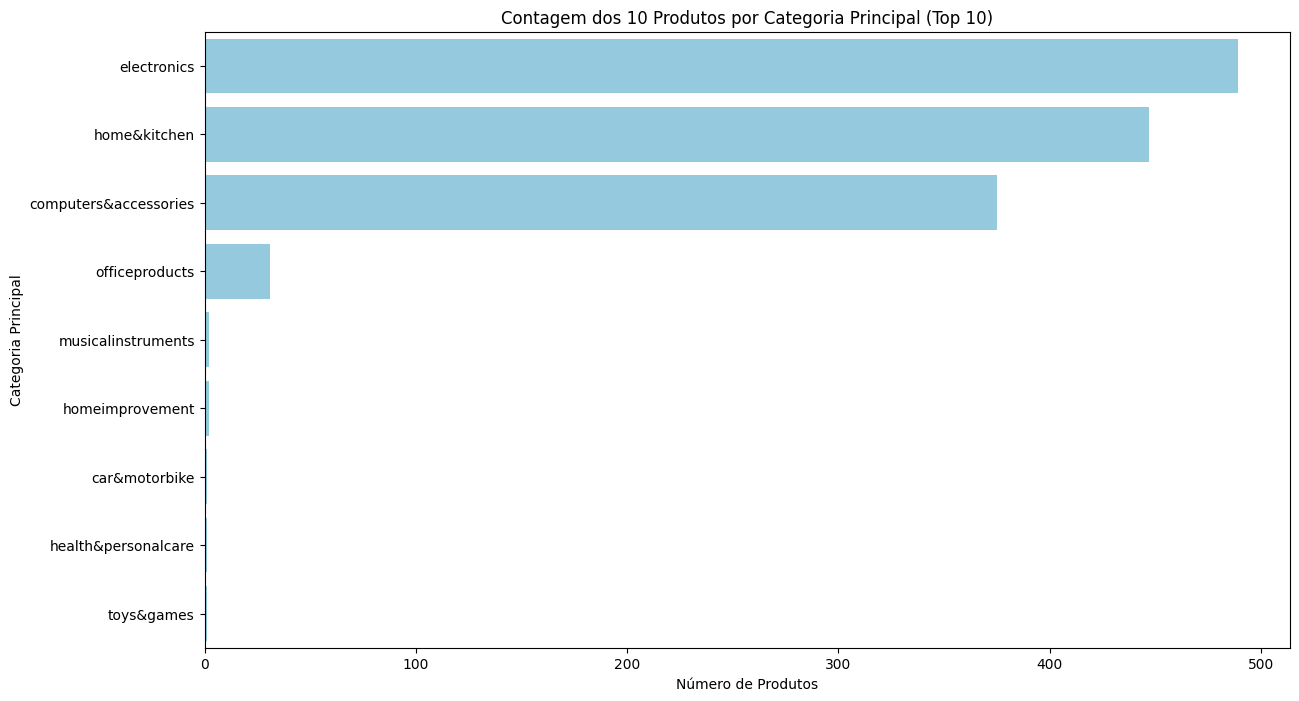

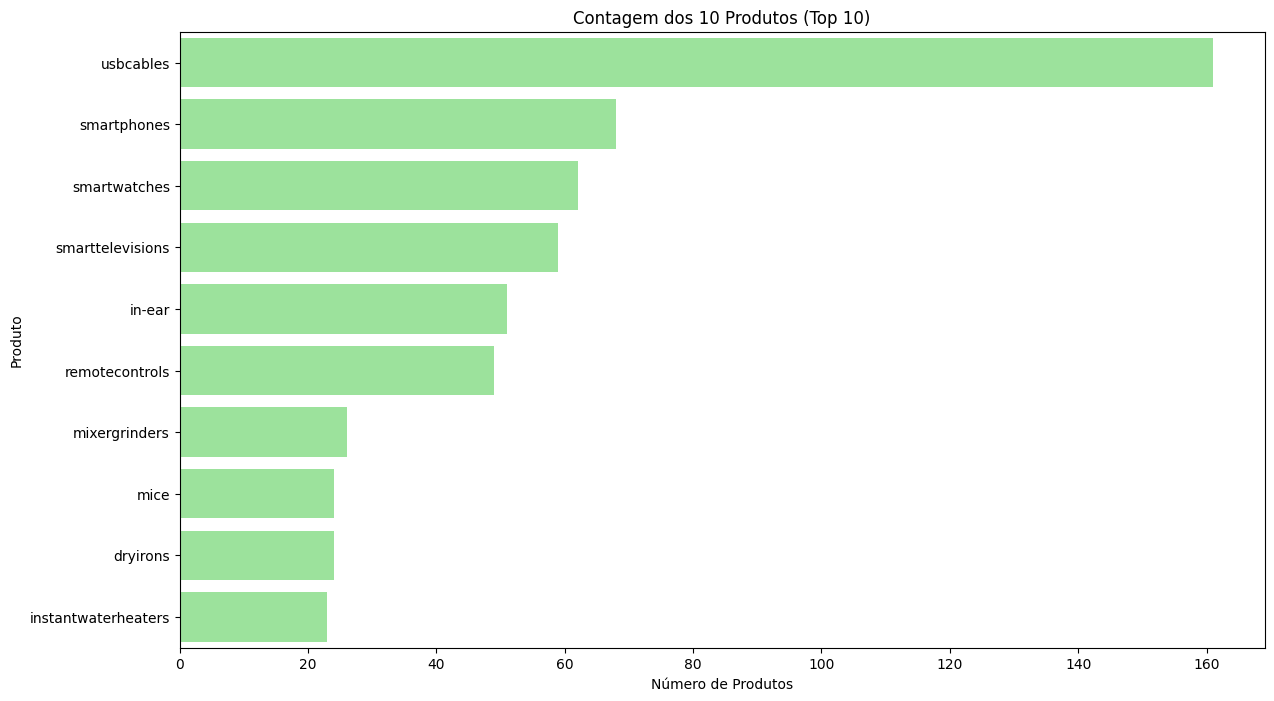

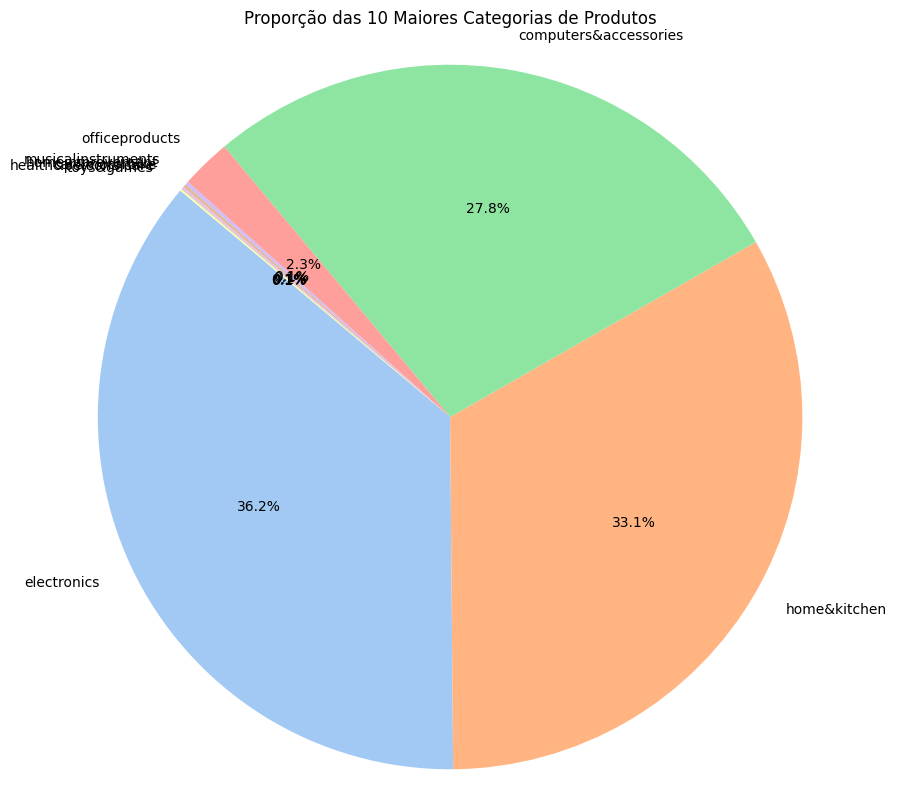

In [ ]:
# 4.2.2 🟣 Ver variáveis ​​categóricas
# Importar as bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Supondo que seu DataFrame unificado se chame 'df_merged'
# Se não, substitua 'df_merged' pelo nome correto

# --- Gráfico de Barras para 'main_category' (já existente) ---

# Passo 1: Preparar os dados para o gráfico de 'main_category'
# Agrupar por 'main_category' e contar o número de produtos
contagem_por_categoria = df_merged.groupby('main_category').size().reset_index(name='contagem')

# Filtrar para as 10 categorias com maior contagem
top_10_para_barra_main = contagem_por_categoria.sort_values(by='contagem', ascending=False).head(10)

# Passo 2: Criar o gráfico de barras para 'main_category'
plt.figure(figsize=(14, 8))
sns.barplot(x='contagem', y='main_category', data=top_10_para_barra_main, color='skyblue')
plt.title('Contagem dos 10 Produtos por Categoria Principal (Top 10)')
plt.xlabel('Número de Produtos')
plt.ylabel('Categoria Principal')
plt.show()

# --- NOVO GRÁFICO: Gráfico de Barras para 'produto' ---

# Passo 3: Preparar os dados para o gráfico de 'produto'
# Agrupar por 'produto' e contar o número de produtos
contagem_por_produto = df_merged.groupby('produto').size().reset_index(name='contagem')

# Filtrar para os 10 produtos com maior contagem
top_10_para_barra_produto = contagem_por_produto.sort_values(by='contagem', ascending=False).head(10)

# Passo 4: Criar o gráfico de barras para 'produto'
plt.figure(figsize=(14, 8))
sns.barplot(x='contagem', y='produto', data=top_10_para_barra_produto, color='lightgreen') # Cor alterada para diferenciar
plt.title('Contagem dos 10 Produtos (Top 10)')
plt.xlabel('Número de Produtos')
plt.ylabel('Produto')
plt.show()

# --- Gráfico de Pizza para 'main_category' (já existente) ---

# Passo 5: Preparar os dados para o gráfico de pizza
top_10_categorias = contagem_por_categoria.sort_values(by='contagem', ascending=False).head(10)

# Passo 6: Criar o gráfico de pizza
plt.figure(figsize=(10, 10))
plt.pie(top_10_categorias['contagem'], labels=top_10_categorias['main_category'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proporção das 10 Maiores Categorias de Produtos')
plt.axis('equal')
plt.show()

In [ ]:
# 4.2.3 🟣 Aplicar medidas de tendência central
# Importar a biblioteca pandas
import pandas as pd
import numpy as np

# Supondo que seu DataFrame unificado e limpo se chame 'df_merged'

# Encontrar todas as colunas numéricas do DataFrame
colunas_numericas = df_merged.select_dtypes(include=np.number).columns.tolist()

print("--- Aplicando Medidas de Tendência Central para Variáveis Numéricas ---")
print("-" * 60)

# Iterar por cada coluna numérica e calcular as medidas
for coluna in colunas_numericas:
    print(f"Medidas para a coluna: '{coluna}'")

    # Calcula a média
    media = df_merged[coluna].mean()
    print(f"Média: {media:.2f}")

    # Calcula a mediana
    mediana = df_merged[coluna].median()
    print(f"Mediana: {mediana:.2f}")

    # Calcula a moda
    moda = df_merged[coluna].mode()
    print("Moda(s):")
    print(moda)

    print("-" * 60)

--- Aplicando Medidas de Tendência Central para Variáveis Numéricas ---
------------------------------------------------------------
Medidas para a coluna: 'discounted_price'
Média: 3289.95
Mediana: 893.00
Moda(s):
0    299.0
Name: discounted_price, dtype: float64
------------------------------------------------------------
Medidas para a coluna: 'actual_price'
Média: 5659.00
Mediana: 1790.00
Moda(s):
0    999.0
Name: actual_price, dtype: float64
------------------------------------------------------------
Medidas para a coluna: 'discount_percentage'
Média: 46.69
Mediana: 49.00
Moda(s):
0    50
Name: discount_percentage, dtype: int64
------------------------------------------------------------
Medidas para a coluna: 'rating'
Média: 4.09
Mediana: 4.10
Moda(s):
0    4.1
Name: rating, dtype: float64
------------------------------------------------------------
Medidas para a coluna: 'rating_count'
Média: 17648.38
Mediana: 4744.00
Moda(s):
0    9378.0
Name: rating_count, dtype: float64
----

Explicação Detalhada do Código:
.mean(), .median() e .mode(): Esses são métodos do pandas que calculam as medidas de tendência central de forma rápida e eficiente para as colunas numéricas.

:.2f: Esta formatação dentro do f-string é usada para mostrar os números com apenas duas casas decimais, o que torna a leitura mais fácil.

Ao executar este código, você poderá comparar os resultados da média e da mediana para cada coluna, o que lhe dará uma pista sobre a distribuição dos seus dados. Se a média e a mediana forem muito diferentes, isso pode indicar a presença de valores extremos que estão distorcendo a média.

##4.2.5 🟣 Ver Distribuição
###Panorama Geral da Solução
Vamos usar a biblioteca seaborn e matplotlib para criar visualizações que nos mostrem a distribuição de duas de suas colunas numéricas: discounted_price e rating.

Criar um Histograma: O histograma mostra a frequência de valores em diferentes "intervalos" (chamados de bins), dando uma visão geral da forma da distribuição.

Criar um Gráfico de Densidade (KDE): O gráfico de densidade suaviza o histograma e mostra a probabilidade de densidade dos dados, sendo útil para ver a forma da distribuição sem a "poluição" dos bins.



Colunas numéricas encontradas para visualização:
['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'score_sentimento']
----------------------------------------


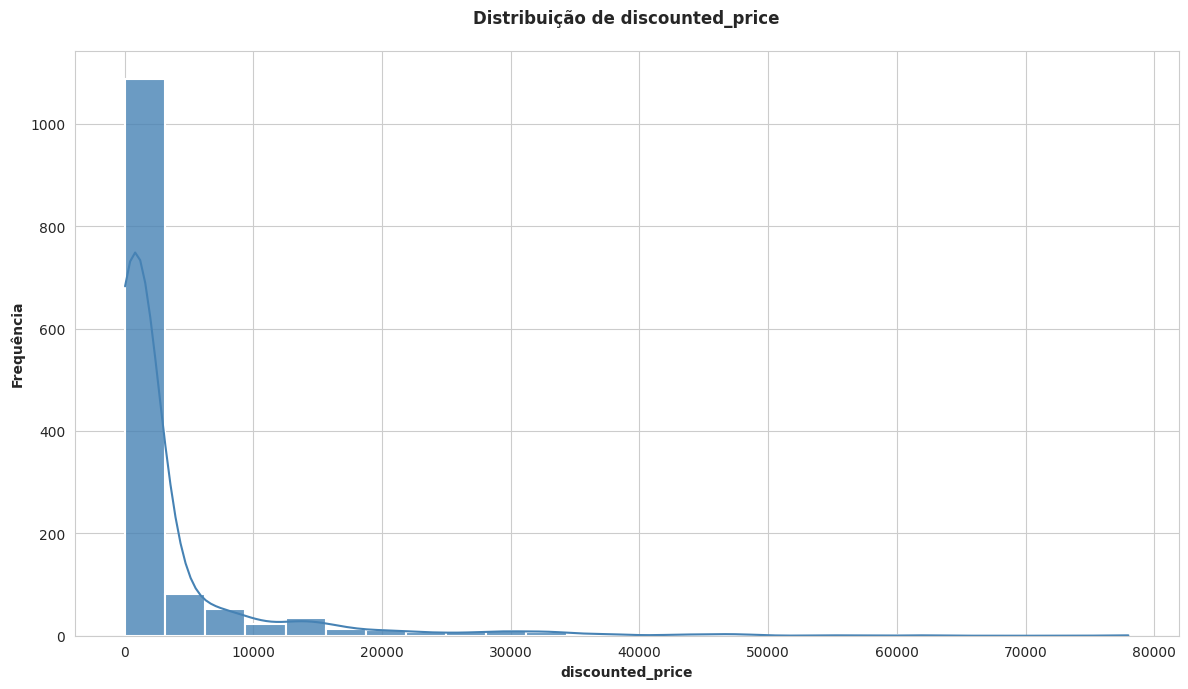

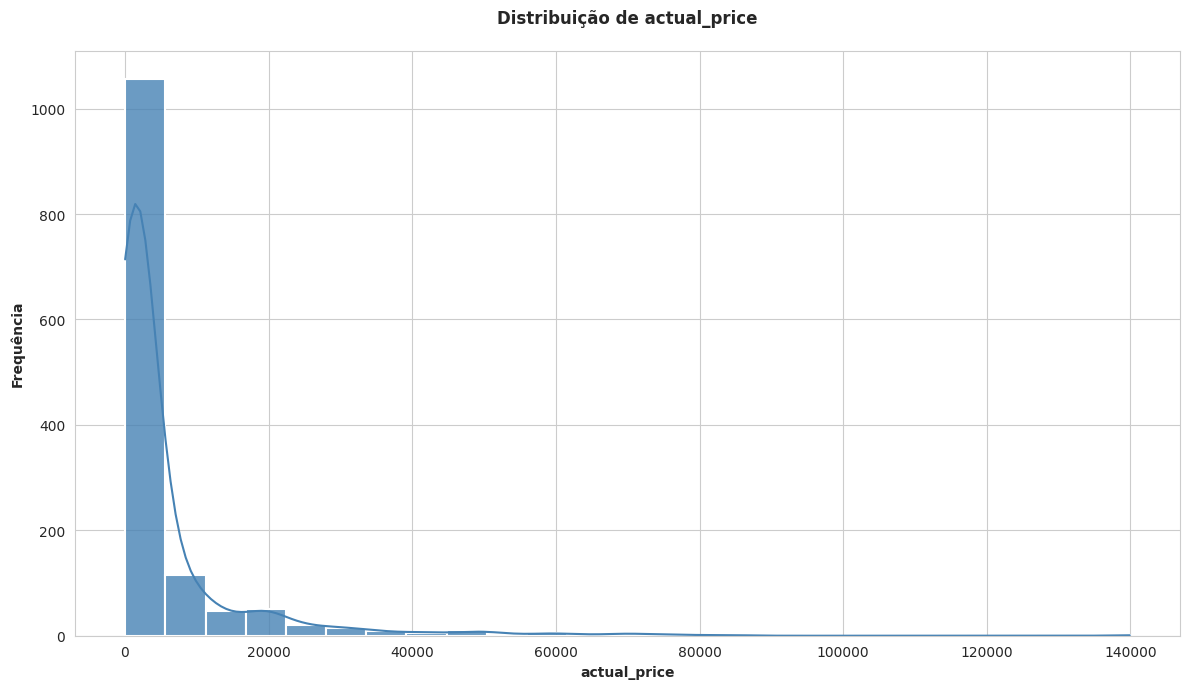

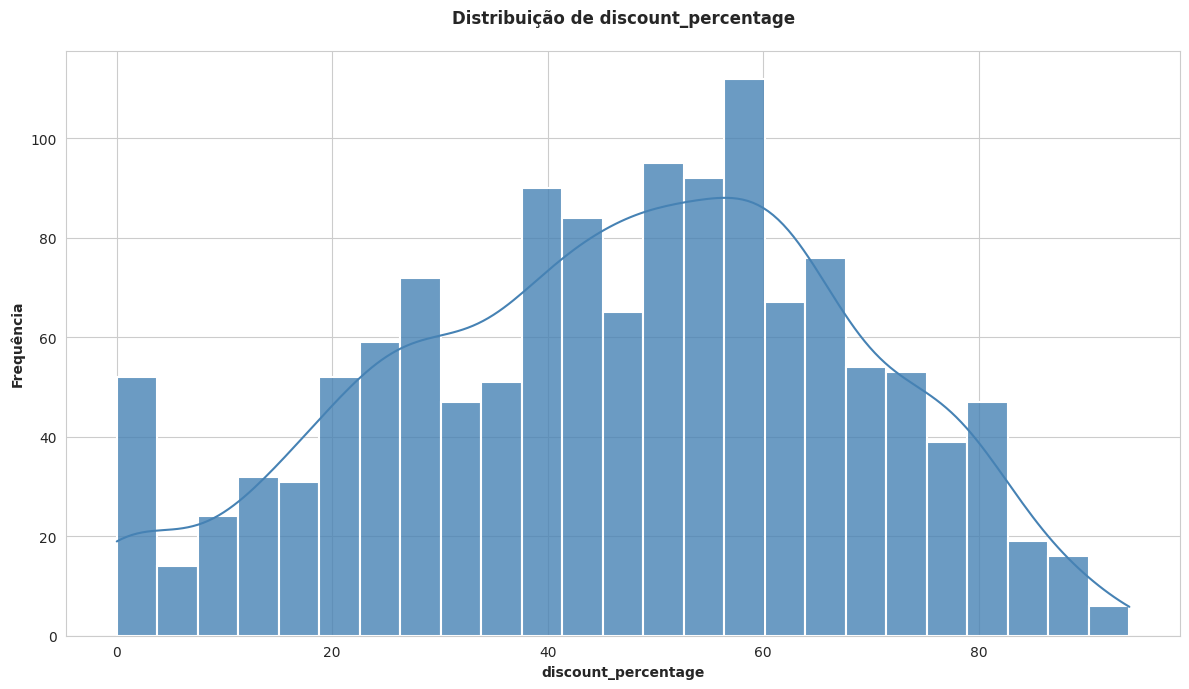

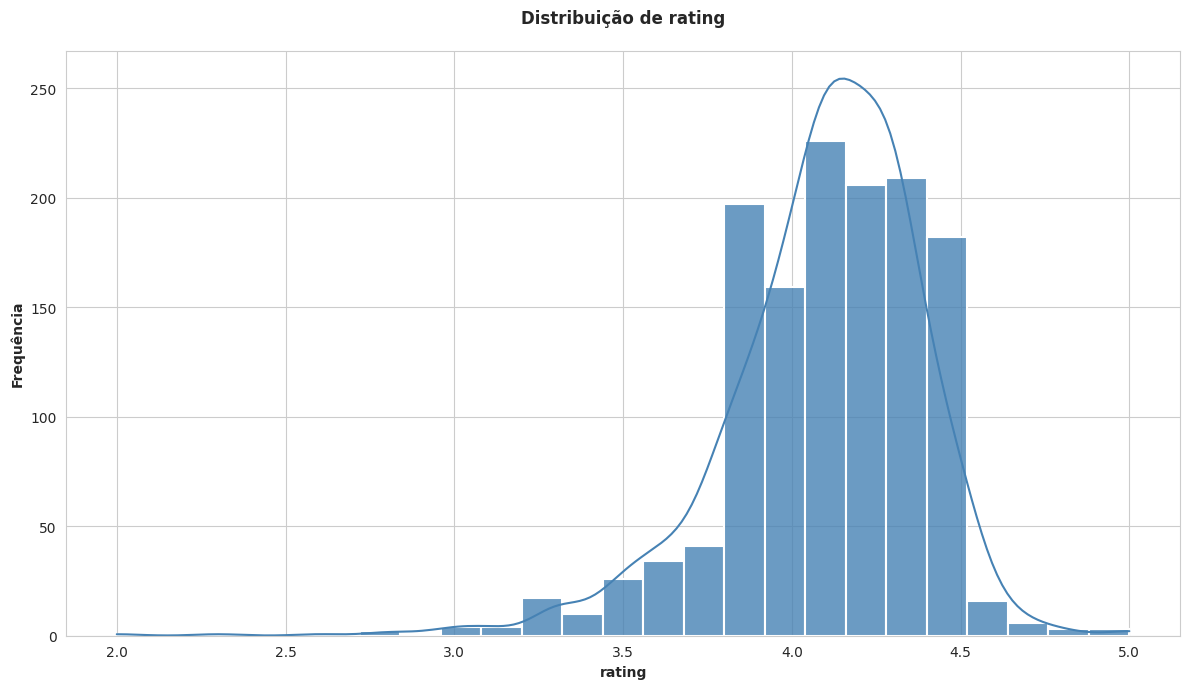

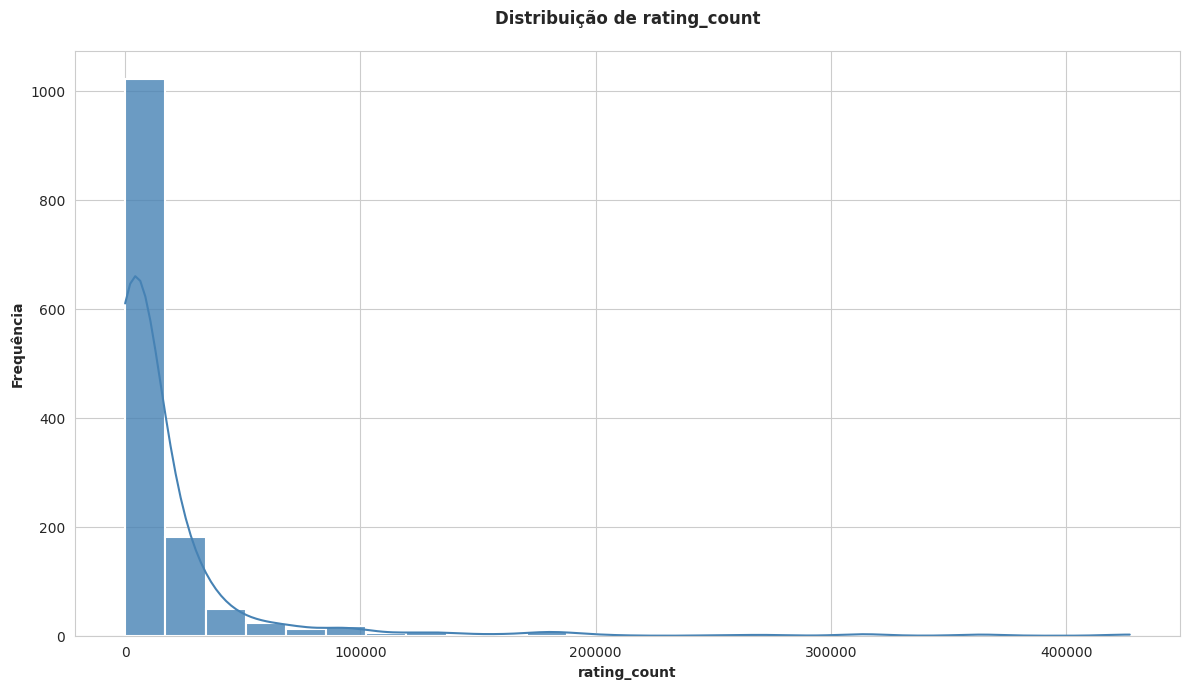

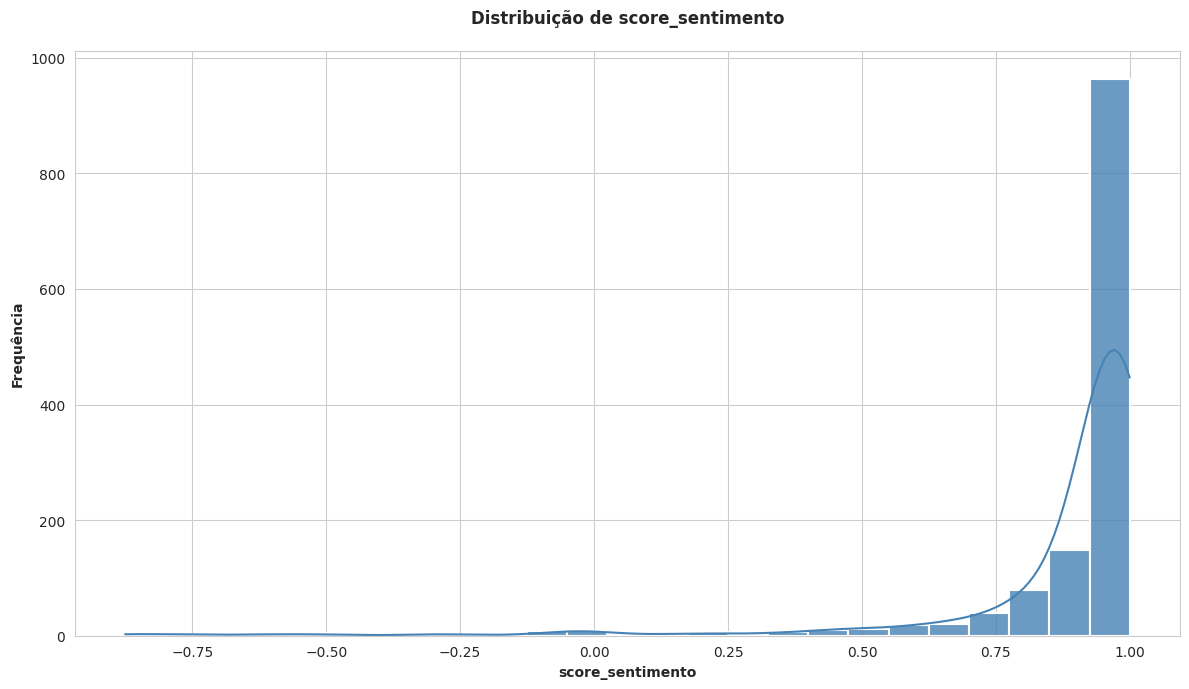

In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicar apenas o estilo whitegrid
sns.set_style("whitegrid")

# Supondo que seu DataFrame unificado e limpo se chame 'df_merged'

# Passo 1: Encontrar todas as colunas numéricas do DataFrame
colunas_numericas = df_merged.select_dtypes(include=np.number).columns.tolist()

print("Colunas numéricas encontradas para visualização:")
print(colunas_numericas)
print("-" * 40)

# Passo 2: Criar um gráfico de distribuição para cada coluna numérica
for coluna in colunas_numericas:
    plt.figure(figsize=(12, 7))

    sns.histplot(df_merged[coluna], kde=True, bins=25,
                color='steelblue', alpha=0.8, edgecolor='white', linewidth=1.5)

    plt.title(f'Distribuição de {coluna}', fontweight='bold', pad=20)
    plt.xlabel(coluna, fontweight='bold')
    plt.ylabel('Frequência', fontweight='bold')

    plt.tight_layout()
    plt.show()

Explicação Detalhada do Código:
sns.histplot(): Esta função do seaborn cria o histograma.

kde=True: Adiciona uma linha de densidade de probabilidade (Kernel Density Estimate) ao histograma, que suaviza a visualização da distribuição.

bins: O número de barras no seu histograma. Você pode ajustar esse número para ver mais ou menos detalhes na distribuição.

plt.figure(figsize=(...)): Define o tamanho do gráfico, o que é útil para evitar que os gráficos fiquem pequenos ou apertados.

plt.title(), plt.xlabel(), plt.ylabel(): Estas funções adicionam os títulos e rótulos necessários para que o gráfico seja facilmente compreendido.

##4.2.6 🟣 Aplicar medidas de dispersão
📍Agora que você já tem uma ideia da distribuição dos seus dados, a próxima meta do seu projeto é Aplicar medidas de dispersão.

Enquanto as medidas de tendência central (média, mediana, moda) nos dizem onde o centro dos dados está, as medidas de dispersão nos mostram o quão "espalhados" os dados estão. Isso é crucial para entender a consistência e a variação nos seus dados.

Panorama Geral da Solução
Vamos calcular as seguintes medidas para as colunas numéricas do seu DataFrame (df_merged):

Desvio Padrão (standard deviation): Indica a quantidade de variação ou dispersão em relação à média. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média, enquanto um desvio padrão alto indica que os pontos estão espalhados por uma ampla gama de valores.

Variância (variance): É o quadrado do desvio padrão. Ela também mede a dispersão, mas é menos intuitiva que o desvio padrão porque suas unidades são o quadrado das unidades originais.

Intervalo Interquartílico (IQR): A diferença entre o 75º percentil (Q3) e o 25º percentil (Q1). O IQR é uma medida robusta de dispersão, pois não é afetada por outliers.

In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np

# Supondo que seu DataFrame unificado e limpo se chame 'df_merged'

# Passo 1: Encontrar todas as colunas numéricas do DataFrame
colunas_numericas = df_merged.select_dtypes(include=np.number).columns.tolist()

print("Iniciando o cálculo das medidas de dispersão para todas as colunas numéricas:")
print("-" * 60)

# Passo 2: Iterar por cada coluna e calcular as medidas de dispersão
for coluna in colunas_numericas:
    print(f"Análise de Medidas de Dispersão para '{coluna}':")

    # Desvio Padrão
    std_dev = df_merged[coluna].std()
    print(f"Desvio Padrão: {std_dev:.2f}")

    # Variância
    var = df_merged[coluna].var()
    print(f"Variância: {var:.2f}")

    # Intervalo Interquartílico (IQR)
    Q1 = df_merged[coluna].quantile(0.25)
    Q3 = df_merged[coluna].quantile(0.75)
    iqr = Q3 - Q1
    print(f"Intervalo Interquartílico (IQR): {iqr:.2f}")

    print("-" * 60)

print("Cálculo das medidas de dispersão concluído.")

Iniciando o cálculo das medidas de dispersão para todas as colunas numéricas:
------------------------------------------------------------
Análise de Medidas de Dispersão para 'discounted_price':
Desvio Padrão: 7154.80
Variância: 51191179.73
Intervalo Interquartílico (IQR): 1820.00
------------------------------------------------------------
Análise de Medidas de Dispersão para 'actual_price':
Desvio Padrão: 11155.62
Variância: 124447774.93
Intervalo Interquartílico (IQR): 3661.00
------------------------------------------------------------
Análise de Medidas de Dispersão para 'discount_percentage':
Desvio Padrão: 21.65
Variância: 468.62
Intervalo Interquartílico (IQR): 31.00
------------------------------------------------------------
Análise de Medidas de Dispersão para 'rating':
Desvio Padrão: 0.30
Variância: 0.09
Intervalo Interquartílico (IQR): 0.40
------------------------------------------------------------
Análise de Medidas de Dispersão para 'rating_count':
Desvio Padrão: 4214

Explicação Detalhada do Código:
.std() e .var(): Estes são métodos pandas que calculam o desvio padrão e a variância de uma coluna, respectivamente.

.quantile(0.25) e .quantile(0.75): Estes métodos são usados para encontrar os valores do primeiro quartil (Q1) e do terceiro quartil (Q3), que são necessários para calcular o IQR.

Essas medidas de dispersão, combinadas com as medidas de tendência central, te dão uma análise completa das características básicas dos seus dados numéricos.

##4.2.7 🟣 Calcular quartis, decis ou percentis

In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np

# Supondo que seu DataFrame unificado e limpo se chame 'df_merged'

# Encontrar todas as colunas numéricas do DataFrame
colunas_numericas = df_merged.select_dtypes(include=np.number).columns.tolist()

print("--- Calculando Quartis, Decis e Percentis para Variáveis Numéricas ---")
print("-" * 60)

# Iterar por cada coluna numérica para calcular as medidas
for coluna in colunas_numericas:
    print(f"Análise estatística e quartis para a coluna: '{coluna}'")

    # Use .describe() para obter rapidamente os quartis e outras estatísticas
    descricao_coluna = df_merged[coluna].describe()
    print(descricao_coluna)

    # Calcular os decis (intervalos de 10%)
    decis = df_merged[coluna].quantile(q=np.arange(0.1, 1.1, 0.1))
    print("\nDecis:")
    print(decis)

    print("-" * 60)

--- Calculando Quartis, Decis e Percentis para Variáveis Numéricas ---
------------------------------------------------------------
Análise estatística e quartis para a coluna: 'discounted_price'
count     1349.000000
mean      3289.954166
std       7154.801166
min         39.000000
25%        349.000000
50%        893.000000
75%       2169.000000
max      77990.000000
Name: discounted_price, dtype: float64

Decis:
0.1      199.0
0.2      299.0
0.3      399.0
0.4      599.0
0.5      893.0
0.6     1289.0
0.7     1799.0
0.8     2959.8
0.9     8906.8
1.0    77990.0
Name: discounted_price, dtype: float64
------------------------------------------------------------
Análise estatística e quartis para a coluna: 'actual_price'
count      1349.000000
mean       5658.998977
std       11155.616296
min          39.000000
25%         899.000000
50%        1790.000000
75%        4560.000000
max      139900.000000
Name: actual_price, dtype: float64

Decis:
0.1       499.0
0.2       699.0
0.3       99

##🟣  4.2.7 Calcular Correlação

A correlação é uma medida estatística que nos diz o quão forte é a relação entre duas variáveis numéricas. Um valor próximo de 1 indica uma forte correlação positiva (quando uma variável aumenta, a outra também tende a aumentar), e um valor próximo de -1 indica uma forte correlação negativa (quando uma variável aumenta, a outra tende a diminuir). Um valor próximo de 0 indica pouca ou nenhuma correlação.

Panorama Geral da Solução
Vamos usar a biblioteca pandas para calcular a matriz de correlação e a biblioteca seaborn para visualizar os resultados em um mapa de calor (heatmap), que é a forma mais fácil de entender as relações.

O plano é o seguinte:

Calcular a Matriz de Correlação: Usaremos a função .corr() do pandas para calcular o coeficiente de correlação de Pearson para todas as colunas numéricas.

Visualizar com um Mapa de Calor: Usaremos um mapa de calor para mostrar a matriz de correlação de forma visual, onde as cores representam a força e a direção da correlação.



Matriz de Correlação:
                     discounted_price  actual_price  discount_percentage  \
discounted_price             1.000000      0.962353            -0.237935   
actual_price                 0.962353      1.000000            -0.113313   
discount_percentage         -0.237935     -0.113313             1.000000   
rating                       0.125891      0.126651            -0.161940   
rating_count                -0.023225     -0.033503             0.003218   
score_sentimento             0.061952      0.066225             0.049445   

                       rating  rating_count  score_sentimento  
discounted_price     0.125891     -0.023225          0.061952  
actual_price         0.126651     -0.033503          0.066225  
discount_percentage -0.161940      0.003218          0.049445  
rating               1.000000      0.096785          0.178612  
rating_count         0.096785      1.000000          0.070423  
score_sentimento     0.178612      0.070423          1.000000

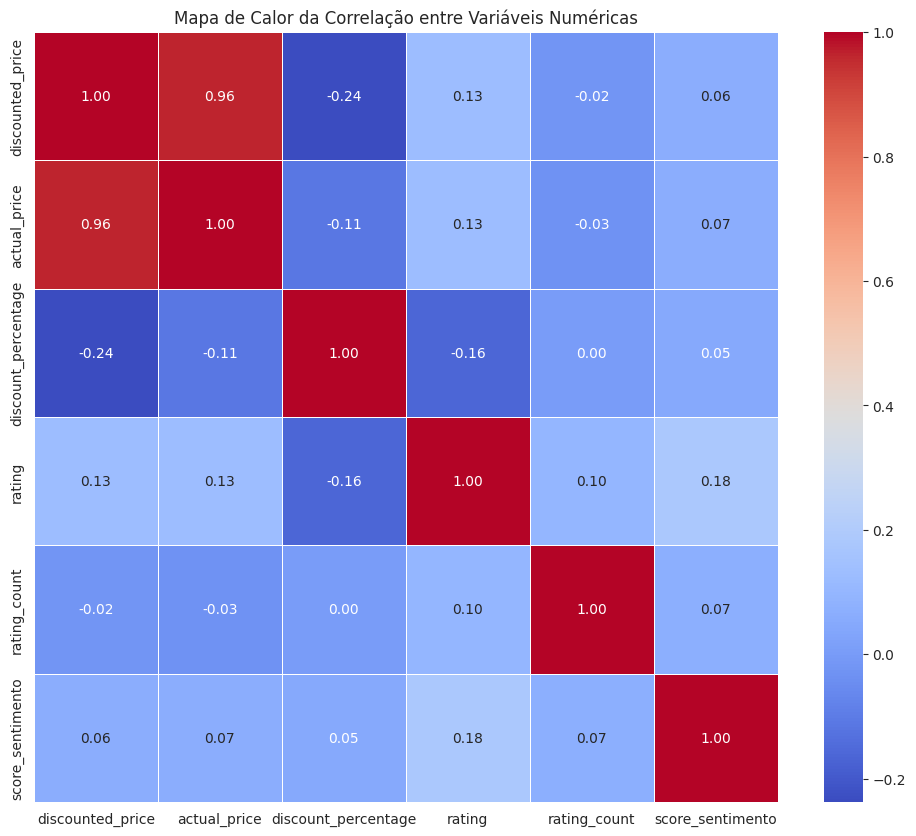

In [ ]:
# Importar as bibliotecas pandas, numpy e seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que seu DataFrame unificado e limpo se chame 'df_merged'

# Passo 1: Selecionar apenas as colunas numéricas
colunas_numericas = df_merged.select_dtypes(include=np.number)

# Calcular a matriz de correlação
matriz_correlacao = colunas_numericas.corr()

print("Matriz de Correlação:")
print(matriz_correlacao)
print("-" * 40)

# Passo 2: Criar o mapa de calor para visualizar a correlação
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor da Correlação entre Variáveis Numéricas')
plt.show()

Explicação Detalhada do Código:
df_merged.select_dtypes(include=np.number): Esta linha seleciona apenas as colunas que têm um tipo de dado numérico. É uma boa prática para evitar erros ao calcular a correlação.

.corr(): Este método do pandas calcula a matriz de correlação. O resultado é um DataFrame onde a correlação de cada coluna com todas as outras é mostrada.

sns.heatmap(): Esta é a função que cria o mapa de calor.

annot=True: Adiciona os valores de correlação no mapa, o que é muito útil.

cmap='coolwarm': Define o esquema de cores. coolwarm é uma ótima escolha porque usa cores diferentes para correlações positivas e negativas.

fmt=".2f": Formata os valores para mostrar apenas duas casas decimais.

##🔴 4.3.1 Aplicar Segmentação
Agora que você já completou a análise exploratória, o próximo passo do seu projeto é Aplicar uma técnica de análise. De acordo com o seu guia, a primeira técnica que vamos explorar é a segmentação.

A segmentação é uma técnica poderosa que consiste em dividir seu dataset em grupos ou segmentos com base em uma ou mais características. Isso permite que você faça análises mais aprofundadas e identifique padrões que talvez não fossem visíveis na análise geral. Por exemplo, você pode querer ver como as avaliações variam entre diferentes categorias de produtos.

Panorama Geral da Solução
Para segmentar o seu conjunto de dados, vamos usar a função .groupby() do pandas mais uma vez. Desta vez, vamos usá-la em conjunto com o método .describe(), que nos fornece um resumo estatístico completo (contagem, média, desvio padrão, quartis, etc.) para cada segmento.

O plano é o seguinte:

Segmentar os dados usando uma variável categórica, como category ou review_title.

Gerar um resumo estatístico para as colunas numéricas de cada segmento, o que nos dará uma visão clara das diferenças entre os grupos.

In [ ]:
# Importar a biblioteca pandas
import pandas as pd

# Supondo que seu DataFrame unificado e limpo se chame 'df_merged'

# Passo 1: Segmentar o dataset por 'category'
# E gerar um resumo estatístico para as colunas 'rating' e 'discounted_price'
analise_por_categoria = df_merged.groupby('main_category')[['rating', 'discounted_price']].describe()

print("Análise estatística por categoria:")
print(analise_por_categoria)
print("-" * 40)

# Passo 2: Segmentar o dataset por 'review_title' para uma análise mais granular
# Aqui vamos focar na média de 'rating' por título de avaliação
analise_por_titulo_avaliacao = df_merged.groupby('review_title')['rating'].mean().reset_index()

# Ordenar os resultados para ver as maiores médias de avaliação
analise_por_titulo_avaliacao = analise_por_titulo_avaliacao.sort_values(by='rating', ascending=False)

print("Média de avaliações por título de avaliação:")
print(analise_por_titulo_avaliacao.head(10)) # Mostra os 10 maiores

Análise estatística por categoria:
                      rating                                               \
                       count      mean       std  min    25%   50%    75%   
main_category                                                               
car&motorbike            1.0  3.800000       NaN  3.8  3.800  3.80  3.800   
computers&accessories  375.0  4.153867  0.270827  3.0  4.000  4.20  4.300   
electronics            489.0  4.077505  0.274207  2.8  3.900  4.10  4.300   
health&personalcare      1.0  4.000000       NaN  4.0  4.000  4.00  4.000   
home&kitchen           447.0  4.041163  0.334633  2.0  3.900  4.10  4.200   
homeimprovement          2.0  4.250000  0.353553  4.0  4.125  4.25  4.375   
musicalinstruments       2.0  3.900000  0.141421  3.8  3.850  3.90  3.950   
officeproducts          31.0  4.309677  0.149119  4.0  4.200  4.30  4.400   
toys&games               1.0  4.300000       NaN  4.3  4.300  4.30  4.300   

                           discounted_pr

Explicação Detalhada do Código:
df_merged.groupby('category')[['rating', 'discounted_price']].describe(): Esta é uma maneira eficiente de gerar um resumo estatístico. O groupby('category') divide os dados por categoria, e o [['rating', 'discounted_price']] seleciona as colunas que você quer analisar. O .describe() então calcula automaticamente várias estatísticas para cada uma dessas colunas, para cada segmento.

.groupby('review_title')['rating'].mean(): Neste exemplo, agrupamos por uma coluna mais granular (review_title) para ver a média de rating para cada tipo de avaliação. Isso pode te dar insights sobre quais tipos de títulos de avaliação estão associados a notas mais altas.

A análise de segmentação te dá uma visão muito mais rica dos seus dados. Analise a saída do describe() para ver as diferenças na média, mediana e quartis entre as categorias.

##🔴 4.3.2 Validar Hipótese
####Teste de Hipótese
Hipótese 1: produtos com maior desconto aplicado (discount_percentage) são melhor classificados (rating);

Hipótese 2: produtos com mais avaliações positivas (score_sentimento) são melhor classificados (rating);

Hipótese 3: produtos com mais avaliações (rating_count) são melhores classificados (rating);

###Hipótese 1
Produtos com maior desconto aplicado (discount_percentage) são melhor classificados (rating)

Teste de Shapiro Wilk para testar a normalidade dos dados (Hipótese 1)

In [ ]:
# Importar a biblioteca scipy.stats para o teste t
from scipy.stats import shapiro
import pandas as pd

# Supondo que seu DataFrame unificado e limpo se chame 'df_merged'

# Verificar os dados
print(df_merged.head())
print(df_merged.info())

# Separar os dados em duas variáveis diferentes
dados_desconto = df_merged['discount_percentage'].dropna()
dados_rating = df_merged['rating'].dropna()

# Shapiro para discount_percentage
estatistica_shapiro_desconto, p_valor_desconto = shapiro(dados_desconto)

# Printar os resultados para discount_percentage
print(f'Estatísticas de Shapiro para discount_percentage: {estatistica_shapiro_desconto}')
print(f'P-valor para discount_percentage: {p_valor_desconto}')

# Shapiro para rating
estatistica_shapiro_rating, p_valor_rating = shapiro(dados_rating)

# Printar os resultados para rating
print(f'Estatísticas de Shapiro para rating: {estatistica_shapiro_rating}')
print(f'P-valor para rating: {p_valor_rating}')

# Interpretando os resultados para discount_percentage
alpha = 0.05
if p_valor_desconto > alpha:
    print('Os dados de discount_percentage parecem seguir uma distribuição normal.')
else:
    print('Os dados de discount_percentage parecem não seguir uma distribuição normal.')

# Interpretando os resultados para rating
if p_valor_rating > alpha:
    print('Os dados de rating parecem seguir uma distribuição normal.')
else:
    print('Os dados de rating parecem não seguir uma distribuição normal.')


   product_id                                       product_name  \
0  b07jw9h4j1  wayona nylon braided usb to lightning fast cha...   
1  b098ns6pvg  ambrane unbreakable 60w / 3a fast charging 1.5...   
2  b096msw6ct  sounce fast phone charging cable & data sync u...   
3  b08hdj86nz  boat deuce usb 300 2 in 1 type-c & micro usb s...   
4  b08cf3b7n1  portronics konnect l 1.2m fast charging 3a 8 p...   

                                            category  discounted_price  \
0  computers&accessories|accessories&peripherals|...             399.0   
1  computers&accessories|accessories&peripherals|...             199.0   
2  computers&accessories|accessories&peripherals|...             199.0   
3  computers&accessories|accessories&peripherals|...             329.0   
4  computers&accessories|accessories&peripherals|...             154.0   

   actual_price  discount_percentage  \
0        1099.0                   64   
1         349.0                   43   
2        1899.0           

Histograma de desconto

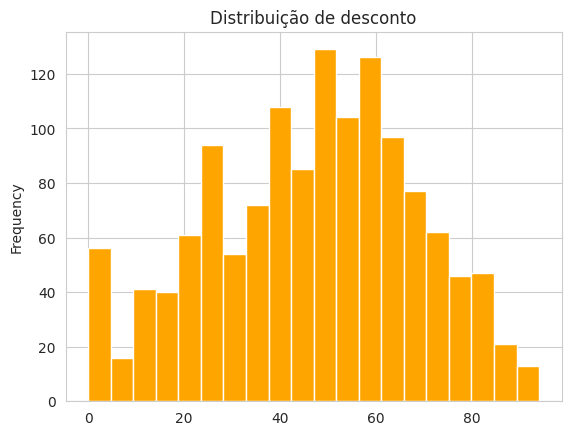

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df_merged['discount_percentage'].plot(kind='hist', bins=20, color='orange', title='Distribuição de desconto')
plt.show()

Correlação de Sperman (pois os dados não estão normalmente distribuidos)



In [ ]:
from scipy.stats import spearmanr
import pandas as pd


# Separar os dados em duas variáveis diferentes
discount_percentage = df_merged['discount_percentage']
rating = df_merged['rating']

# Criando um dataframe
df_cleaned = pd.DataFrame({'discount_percentage': discount_percentage, 'rating': rating})
df_cleaned = df_cleaned.dropna()  # Remover linhas com valores NaN em ambas as colunas

# Extraindo as séries limpas
discount_percentage = df_cleaned['discount_percentage']
rating = df_cleaned['rating']

# Spearman para as variáveis discount_percentage e rating
correlation, p_value = spearmanr(discount_percentage, rating)
print(f'Correlação de Spearman: {correlation}, p-value: {p_value}')

# Comparar com alpha (0.05)
alpha = 0.05
if p_value < alpha:
    print("Rejeita a hipótese nula. Há uma correlação significativa.")
else:
    print("Não há evidência suficiente para rejeitar a hipótese nula, ou seja, não há uma correlação significativa.")


Correlação de Spearman: -0.14981578705347304, p-value: 3.2266133076283806e-08
Rejeita a hipótese nula. Há uma correlação significativa.


O valor da correlação de Spearman é de -0.15, o que indica uma correlação negativa fraca entre a classificação (rating) e a porcentagem de desconto (discount_percentage).

Isso sugere que, à medida que o desconto aplicado a um produto aumenta, a sua classificação tende a diminuir ligeiramente. Apesar de a relação ser fraca, o p-valor de 2.16e-09 é extremamente baixo (muito menor que 0.05). Este resultado é estatisticamente significativo.

Portanto, rejeitamos a hipótese nula e concluímos que, apesar de fraca, existe uma correlação significativa entre o percentual de desconto e a classificação do produto.

Teste de significância para a hipótese 1

In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Definindo um ponto de corte para alta e baixa porcentagem de desconto (0.50)
alta_group = df_merged[df_merged['discount_percentage'] > 0.5]['rating']
baixa_group = df_merged[df_merged['discount_percentage'] <= 0.5]['rating']

# Execute o teste de Mann-Whitney U
estatistica, p_value = mannwhitneyu(alta_group, baixa_group, alternative='two-sided')

# Imprima os resultados
print(f"Mann-Whitney U statistic: {estatistica:.4f}")
print(f"P-value: {p_value:.4f}")

# Verifique se o p-value é significativo (por exemplo, menor que 0.05)
if p_value < 0.05:
    print("A diferença entre os grupos 'alto' e 'baixo' do percentual de desconto é estatisticamente significativo.")
else:
    print("Não há diferença estatisticamente significativa entre os grupos 'alto' e 'baixo' do percentual de desconto.")


Mann-Whitney U statistic: 20269.0000
P-value: 0.0001
A diferença entre os grupos 'alto' e 'baixo' do percentual de desconto é estatisticamente significativo.


Teste de significância para a hipótese 1

O teste de Mann-Whitney mostra que existe uma diferença significativa entre os grupos "alto" e "baixo" de percentual de desconto. Isso implica que a distribuição das classificações é diferente entre os dois grupos, e essa diferença é estatisticamente significativa.

Regressão linear para a hipótese 1

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     34.82
Date:                Sun, 21 Sep 2025   Prob (F-statistic):           4.84e-09
Time:                        21:29:35   Log-Likelihood:                -213.19
No. Observations:                1079   AIC:                             430.4
Df Residuals:                    1077   BIC:                             440.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.2047    

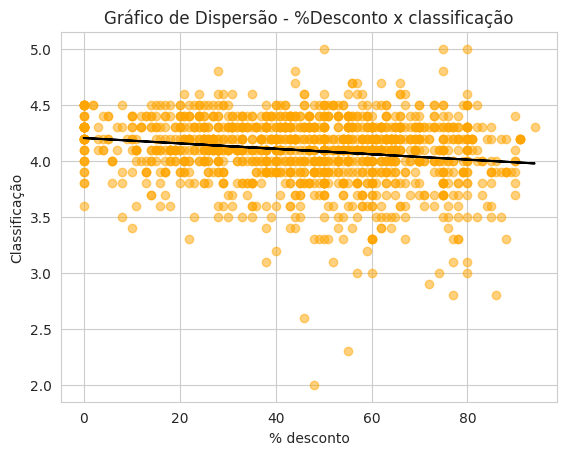

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

df = df_merged.dropna(subset=['discount_percentage', 'rating'])

# Selecionar as variáveis independentes (X) e dependente (y)
X = df_merged[['discount_percentage']]  # Variável independente
y = df_merged['rating']  # Variável dependente

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Adicionar uma constante ao X (intercepto)
X_train_sm = sm.add_constant(X_train)

# Ajustar o modelo de regressão linear
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Printar o sumário do modelo
print(model_sm.summary())

# Plotar o gráfico de dispersão
plt.scatter(df_merged['discount_percentage'], df_merged['rating'], alpha=0.5, color='orange')
plt.title('Gráfico de Dispersão - %Desconto x classificação')
plt.xlabel('% desconto')
plt.ylabel('Classificação')
plt.plot(df_merged['discount_percentage'], model.predict(X), color='black')
plt.show()

###Hipótese 2
Produtos com mais avaliações positivas (score_sentimento) são melhor classificados (rating);

Teste de normalidade para a hipótese 2

In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
from scipy.stats import shapiro
import numpy as np

# Supondo que seu DataFrame unificado e limpo se chame 'df_merged'

print("--- Verificando a Normalidade das Variáveis Numéricas (Teste de Shapiro-Wilk) ---")
print("-" * 60)

# Colunas que queremos testar
colunas_para_shapiro = ['score_sentimento', 'discount_percentage', 'rating_count']

# Iterar sobre as colunas e aplicar o teste
for coluna in colunas_para_shapiro:
    # Remover valores nulos, pois o teste shapiro não os aceita
    dados_para_teste = df_merged[coluna].dropna()

    # Realizar o teste de Shapiro-Wilk
    estatistica_shapiro, p_valor = shapiro(dados_para_teste)

    print(f"Resultados para a coluna '{coluna}':")
    print(f"Estatística de Shapiro: {estatistica_shapiro:.4f}")
    print(f"P-valor: {p_valor:.4f}")

    # Interpretar o resultado
    alpha = 0.05
    if p_valor > alpha:
        print('Conclusão: Os dados parecem seguir uma distribuição normal.')
    else:
        print('Conclusão: Os dados parecem não seguir uma distribuição normal.')

    print("-" * 60)

--- Verificando a Normalidade das Variáveis Numéricas (Teste de Shapiro-Wilk) ---
------------------------------------------------------------
Resultados para a coluna 'score_sentimento':
Estatística de Shapiro: 0.4540
P-valor: 0.0000
Conclusão: Os dados parecem não seguir uma distribuição normal.
------------------------------------------------------------
Resultados para a coluna 'discount_percentage':
Estatística de Shapiro: 0.9830
P-valor: 0.0000
Conclusão: Os dados parecem não seguir uma distribuição normal.
------------------------------------------------------------
Resultados para a coluna 'rating_count':
Estatística de Shapiro: 0.4067
P-valor: 0.0000
Conclusão: Os dados parecem não seguir uma distribuição normal.
------------------------------------------------------------


Correlação de Spearman para hipotese 2

In [ ]:
from scipy.stats import spearmanr
import pandas as pd

# Separar os dados em duas variáveis diferentes
score_sentimento = df_merged['score_sentimento']
rating = df_merged['rating']

# Criando um dataframe
df_cleaned = pd.DataFrame({'score_sentimento': score_sentimento, 'rating': rating})
df_cleaned = df_cleaned.dropna()  # Remover linhas com valores NaN em ambas as colunas

# Extraindo as séries limpas
score_sentimento = df_cleaned['score_sentimento']
rating = df_cleaned['rating']

# Spearman para as variáveis score_sentimento e rating
correlation, p_value = spearmanr(score_sentimento, rating)
print(f'Correlação de Spearman: {correlation}, p-value: {p_value}')

# Comparar com alpha (0.05)
alpha = 0.05
if p_value < alpha:
    print("Rejeita a hipótese nula. Há uma correlação significativa.")
else:
    print("Não há evidência suficiente para rejeitar a hipótese nula, ou seja, não há uma correlação significativa.")

Correlação de Spearman: 0.23058635307661468, p-value: 9.72668829362889e-18
Rejeita a hipótese nula. Há uma correlação significativa.


O valor da correlação de Spearman é de 0.2305, indicando uma correlação positiva fraca entre o score de sentimento (score_sentimento) e a classificação (rating).

Mesmo que a correlação entre as variáveis seja fraca (0.23), ela é estatisticamente significativa. Isso quer dizer que a chance de essa correlação ter ocorrido por puro acaso é praticamente zero. Em outras palavras, é muito improvável que a relação observada entre o score_sentimento e o rating seja aleatória.

Portanto, a conclusão é que há uma correlação significativa entre as duas variáveis, mesmo que a força dessa correlação seja fraca.

In [ ]:
from scipy.stats import spearmanr
import pandas as pd

# Separar os dados em duas variáveis diferentes
score_sentimento = df_merged['score_sentimento']
rating = df_merged['rating']

# Criando um dataframe
df_cleaned = pd.DataFrame({'score_sentimento': score_sentimento, 'rating': rating})
df_cleaned = df_cleaned.dropna()  # Remover linhas com valores NaN em ambas as colunas

# Extraindo as séries limpas
score_sentimento = df_cleaned['score_sentimento']
rating = df_cleaned['rating']

# Spearman para as variáveis score_sentimento e rating
correlation, p_value = spearmanr(score_sentimento, rating)
print(f'Correlação de Spearman: {correlation}, p-value: {p_value}')

# Comparar com alpha (0.05)
alpha = 0.05
if p_value < alpha:
    print("Rejeita a hipótese nula. Há uma correlação significativa.")
else:
    print("Não há evidência suficiente para rejeitar a hipótese nula, ou seja, não há uma correlação significativa.")

Correlação de Spearman: 0.23058635307661468, p-value: 9.72668829362889e-18
Rejeita a hipótese nula. Há uma correlação significativa.


In [ ]:
from scipy.stats import spearmanr
import pandas as pd

# Separar os dados em duas variáveis diferentes
score_sentimento = df_merged['score_sentimento']
rating = df_merged['rating']

# Criando um dataframe
df_cleaned = pd.DataFrame({'score_sentimento': score_sentimento, 'rating': rating})
df_cleaned = df_cleaned.dropna()  # Remover linhas com valores NaN em ambas as colunas

# Extraindo as séries limpas
score_sentimento = df_cleaned['score_sentimento']
rating = df_cleaned['rating']

# Spearman para as variáveis score_sentimento e rating
correlation, p_value = spearmanr(score_sentimento, rating)
print(f'Correlação de Spearman: {correlation}, p-value: {p_value}')

# Comparar com alpha (0.05)
alpha = 0.05
if p_value < alpha:
    print("Rejeita a hipótese nula. Há uma correlação significativa.")
else:
    print("Não há evidência suficiente para rejeitar a hipótese nula, ou seja, não há uma correlação significativa.")

Correlação de Spearman: 0.23058635307661468, p-value: 9.72668829362889e-18
Rejeita a hipótese nula. Há uma correlação significativa.


Teste de significância para a hipótese 2

In [ ]:


import pandas as pd
from scipy.stats import mannwhitneyu

# Definindo um ponto de corte para alta e baixa score_sentimento (0.75)
alta_group = df_merged[df_merged['score_sentimento'] > 0.75]['rating']
baixa_group = df_merged[df_merged['score_sentimento'] <= 0.75]['rating']

# Execute o teste de Mann-Whitney U
estatistica, p_value = mannwhitneyu(alta_group, baixa_group, alternative='two-sided')

# Imprima os resultados
print(f"Mann-Whitney U statistic: {estatistica:.4f}")
print(f"P-value: {p_value:.4f}")

# Verifique se o p-value é significativo (por exemplo, menor que 0.05)
if p_value < 0.05:
    print("A diferença entre os grupos 'alto' e 'baixo' do score de sentimento é estatisticamente significativo.")
else:
    print("Não há diferença estatisticamente significativa entre os grupos 'alto' e 'baixo' do score de sentimento.")

Mann-Whitney U statistic: 105519.0000
P-value: 0.0000
A diferença entre os grupos 'alto' e 'baixo' do score de sentimento é estatisticamente significativo.


Regressão linear para a hipótese 2

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     43.48
Date:                Sun, 21 Sep 2025   Prob (F-statistic):           6.71e-11
Time:                        21:29:35   Log-Likelihood:                -209.00
No. Observations:                1079   AIC:                             422.0
Df Residuals:                    1077   BIC:                             432.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.8861      0.033  

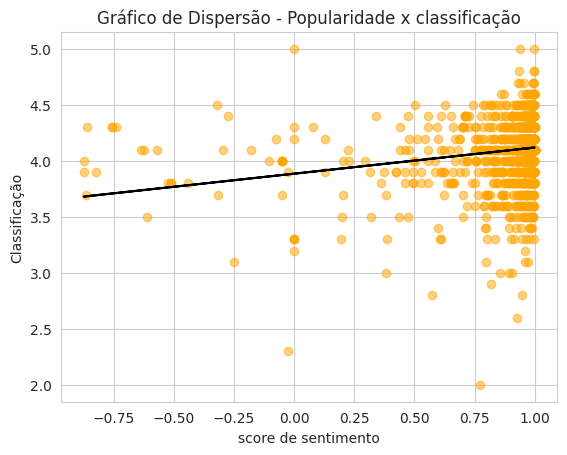

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Corrigindo rating
df_merged['rating'] = pd.to_numeric(df_merged['rating'], errors='coerce')
df_merged = df.dropna(subset=['score_sentimento', 'rating'])

# Selecionar as variáveis independentes (X) e dependente (y)
X = df_merged[['score_sentimento']]  # Variável independente
y = df_merged['rating']  # Variável dependente

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Adicionar uma constante ao X (intercepto)
X_train_sm = sm.add_constant(X_train)

# Ajustar o modelo de regressão linear
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Printar o sumário do modelo
print(model_sm.summary())

# Plotar o gráfico de dispersão
plt.scatter(df_merged['score_sentimento'], df_merged['rating'], alpha=0.5, color='orange')
plt.title('Gráfico de Dispersão - Popularidade x classificação')
plt.xlabel('score de sentimento')
plt.ylabel('Classificação')
plt.plot(df['score_sentimento'], model.predict(X), color='black')
plt.show()

###Hipótese 3
Teste de normalidade para a hipótese 3

In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
from scipy.stats import shapiro
import numpy as np

# Supondo que seu DataFrame unificado e limpo se chame 'df_merged'

print("--- Verificando a Normalidade da coluna 'rating_count' (Teste de Shapiro-Wilk) ---")
print("-" * 60)

# Selecionar a coluna 'rating_count' para o teste
dados_para_teste = df_merged['rating_count']

# Remover valores nulos, pois o teste shapiro não os aceita
dados_para_teste = dados_para_teste.dropna()

# Realizar o teste de Shapiro-Wilk
estatistica_shapiro, p_valor = shapiro(dados_para_teste)

print(f"Resultados para a coluna 'rating_count':")
print(f"Estatística de Shapiro: {estatistica_shapiro:.4f}")
print(f"P-valor: {p_valor:.4f}")

# Interpretar o resultado
alpha = 0.05
if p_valor > alpha:
    print('Conclusão: Os dados parecem seguir uma distribuição normal.')
else:
    print('Conclusão: Os dados parecem não seguir uma distribuição normal.')

print("-" * 60)

--- Verificando a Normalidade da coluna 'rating_count' (Teste de Shapiro-Wilk) ---
------------------------------------------------------------
Resultados para a coluna 'rating_count':
Estatística de Shapiro: 0.4067
P-valor: 0.0000
Conclusão: Os dados parecem não seguir uma distribuição normal.
------------------------------------------------------------


Histograma de desconto

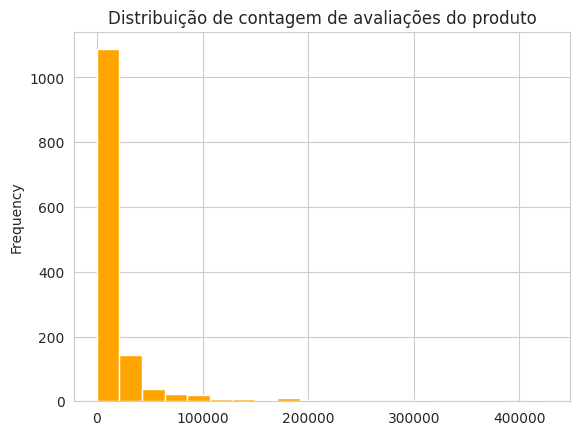

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df_merged['rating_count'].plot(kind='hist', bins=20, color='orange', title='Distribuição de contagem de avaliações do produto')
plt.show()

###Correlação de spearman

Teste de correlação para a hipótese 3

In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
from scipy.stats import spearmanr
import numpy as np

# Supondo que seu DataFrame unificado e limpo se chame 'df_merged'

print("--- Calculando a Correlação de Spearman entre rating e rating_count ---")
print("-" * 60)

# Separar os dados em duas variáveis diferentes
# E remover linhas com valores NaN em ambas as colunas
df_cleaned = df_merged[['rating_count', 'rating']].dropna()

# Extrair as séries limpas
rating_count = df_cleaned['rating_count']
rating = df_cleaned['rating']

# Spearman para as variáveis rating_count e rating
correlation, p_value = spearmanr(rating_count, rating)

print(f"Correlação de Spearman: {correlation:.4f}")
print(f"P-valor: {p_value:.4f}")

# Comparar com alpha (0.05)
alpha = 0.05
if p_value < alpha:
    print("\nConclusão: Rejeitamos a hipótese nula.")
    print("Há uma correlação significativa entre o número de avaliações e a nota.")
else:
    print("\nConclusão: Não há evidência suficiente para rejeitar a hipótese nula.")
    print("Não há uma correlação significativa entre o número de avaliações e a nota.")

print("-" * 60)

--- Calculando a Correlação de Spearman entre rating e rating_count ---
------------------------------------------------------------
Correlação de Spearman: 0.1926
P-valor: 0.0000

Conclusão: Rejeitamos a hipótese nula.
Há uma correlação significativa entre o número de avaliações e a nota.
------------------------------------------------------------


A correlação de Spearman de 0.1810 indica que há uma correlação positiva significativa entre a variável rating_count (contagem de classificações) e rating (classificação). Isso sugere que produtos com mais avaliações tendem a ter classificações mais altas.

Teste de Significância

In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Ajustando o limite para categoria alto e baixo rating_count baseado na distribuição dos dados (utilizando a mediana)
mediana = df_merged['rating_count'].median()

# Criar grupos baseados na mediana
alta_group = df_merged[df_merged['rating_count'] > mediana]['rating']
baixa_group = df_merged[df_merged['rating_count'] <= mediana]['rating']

# Executar o teste de Mann-Whitney U
estatistica, p_value = mannwhitneyu(alta_group, baixa_group, alternative='two-sided')

# Imprimir os resultados
print(f"Mann-Whitney U statistic: {estatistica:.4f}")
print(f"P-value: {p_value:.4f}")

# Verificar se o p-value é significativo (por exemplo, menor que 0.05)
if p_value < 0.05:
    print("A diferença entre os grupos 'alto' e 'baixo' da contagem de classificações é estatisticamente significativa.")
else:
    print("Não há diferença estatisticamente significativa entre os grupos 'alto' e 'baixo' da contagem de classificações.")


Mann-Whitney U statistic: 270604.5000
P-value: 0.0000
A diferença entre os grupos 'alto' e 'baixo' da contagem de classificações é estatisticamente significativa.


Regressão Linear

--- Análise de Regressão Linear entre Rating Count e Rating ---
------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     12.74
Date:                Sun, 21 Sep 2025   Prob (F-statistic):           0.000371
Time:                        21:29:36   Log-Likelihood:                -271.83
No. Observations:                1349   AIC:                             547.7
Df Residuals:                    1347   BIC:                             558.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
----

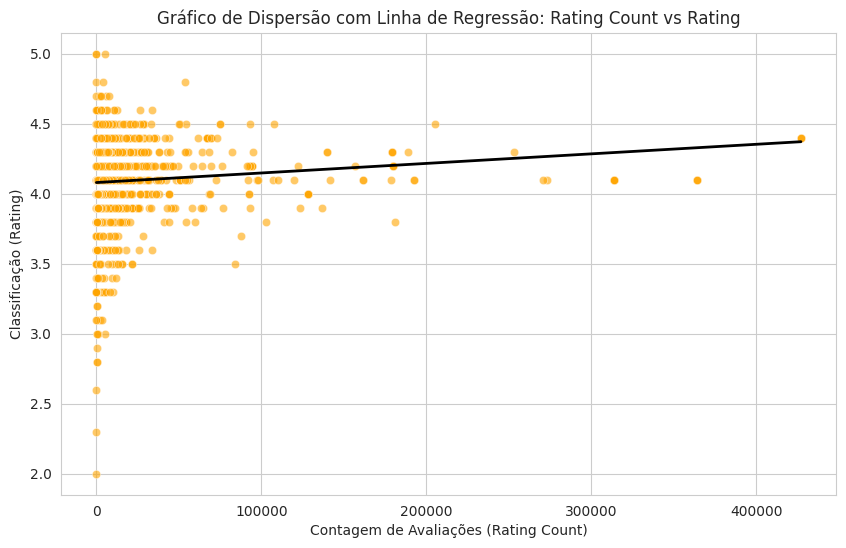

In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que seu DataFrame unificado e limpo se chame 'df_merged'

print("--- Análise de Regressão Linear entre Rating Count e Rating ---")
print("-" * 60)

# 1. Selecionar as variáveis independente (X) e dependente (y)
# A variável independente é 'rating_count' e a dependente é 'rating'
X = df_merged['rating_count']
y = df_merged['rating']

# 2. Adicionar uma constante ao X para o intercepto (essencial para statsmodels)
X_sm = sm.add_constant(X)

# 3. Criar e treinar o modelo de regressão linear (OLS - Ordinary Least Squares)
model = sm.OLS(y, X_sm).fit()

# 4. Imprimir o resumo do modelo para analisar os resultados
print(model.summary())

# 5. Visualizar o gráfico de dispersão com a linha de regressão
plt.figure(figsize=(10, 6))

# Gerar o gráfico de dispersão
sns.scatterplot(x=df_merged['rating_count'], y=df_merged['rating'], alpha=0.6,color='orange')

# Adicionar a linha de regressão do modelo
# Para isso, criamos um array de pontos para a linha
x_range = np.linspace(df_merged['rating_count'].min(), df_merged['rating_count'].max(), 100)
y_range = model.predict(sm.add_constant(x_range))
plt.plot(x_range, y_range, color='black', linewidth=2)

plt.title('Gráfico de Dispersão com Linha de Regressão: Rating Count vs Rating')
plt.xlabel('Contagem de Avaliações (Rating Count)')
plt.ylabel('Classificação (Rating)')
plt.show()

##🔴 4.3.3 Calcular o Risco Relativo
Este código aplica a técnica de Risco Relativo para validar três hipóteses sobre a sua base de dados.

Objetivo: Determinar se uma característica (como ter um alto desconto, um alto score_sentimento ou uma alta contagem de avaliações) aumenta ou diminui o risco de um produto ter uma avaliação alta (rating >= 4.5).

Metodologia: Para cada hipótese, o código divide o dataset em dois grupos (por exemplo, "produtos com alto desconto" e "produtos com baixo desconto"), usando a mediana como ponto de corte.

Cálculo e Análise: Ele calcula a probabilidade do evento (rating alto) em cada grupo e, em seguida, divide essas probabilidades para encontrar o risco relativo. A interpretação é direta:

Um risco relativo maior que 1 significa que o primeiro grupo tem um risco maior de ter avaliações altas.

Um risco relativo menor que 1 significa que o risco é menor.

Este método permite que você transforme suas suposições sobre o dataset em conclusões estatísticas, com um único número que quantifica a força dessa relação.



In [ ]:
import pandas as pd
import numpy as np

# Supondo que seu DataFrame unificado e limpo se chame 'df_merged'

# Hipótese 1: Produtos com maior desconto aplicado são melhor classificados
print("--- Validando Hipótese 1: Maior desconto vs. Rating alto ---")
# Definir o ponto de corte (a mediana) para dividir os grupos
mediana_desconto = df_merged['discount_percentage'].median()
# Definir o evento: rating >= 4.5
limite_rating = 4.5

grupo_alto_desconto = df_merged[df_merged['discount_percentage'] > mediana_desconto]
grupo_baixo_desconto = df_merged[df_merged['discount_percentage'] <= mediana_desconto]

prob_alto_desconto = len(grupo_alto_desconto[grupo_alto_desconto['rating'] >= limite_rating]) / len(grupo_alto_desconto)
prob_baixo_desconto = len(grupo_baixo_desconto[grupo_baixo_desconto['rating'] >= limite_rating]) / len(grupo_baixo_desconto)

risco_relativo_desconto = prob_alto_desconto / prob_baixo_desconto
print(f"Risco Relativo (Alto Desconto vs. Baixo Desconto): {risco_relativo_desconto:.2f}")
if risco_relativo_desconto > 1:
    print(f"Conclusão: O risco de ter rating >= 4.5 é {risco_relativo_desconto:.2f} vezes maior para produtos com mais desconto.")
else:
    print(f"Conclusão: O risco de ter rating >= 4.5 é {1/risco_relativo_desconto:.2f} vezes menor para produtos com mais desconto.")
print("-" * 60)

# Hipótese 2: Produtos com mais avaliações positivas são melhor classificados
print("--- Validando Hipótese 2: Sentimento positivo vs. Rating alto ---")
mediana_sentimento = df_merged['score_sentimento'].median()

grupo_positivo = df_merged[df_merged['score_sentimento'] > mediana_sentimento]
grupo_negativo = df_merged[df_merged['score_sentimento'] <= mediana_sentimento]

prob_positivo = len(grupo_positivo[grupo_positivo['rating'] >= limite_rating]) / len(grupo_positivo)
prob_negativo = len(grupo_negativo[grupo_negativo['rating'] >= limite_rating]) / len(grupo_negativo)

risco_relativo_sentimento = prob_positivo / prob_negativo
print(f"Risco Relativo (Sentimento Positivo vs. Negativo): {risco_relativo_sentimento:.2f}")
if risco_relativo_sentimento > 1:
    print(f"Conclusão: O risco de ter rating >= 4.5 é {risco_relativo_sentimento:.2f} vezes maior para produtos com sentimento mais positivo.")
else:
    print(f"Conclusão: O risco de ter rating >= 4.5 é {1/risco_relativo_sentimento:.2f} vezes menor para produtos com sentimento mais positivo.")
print("-" * 60)

# Hipótese 3: Produtos com mais avaliações (rating_count) são melhor classificados
print("--- Validando Hipótese 3: Mais avaliações vs. Rating alto ---")
mediana_contagem = df_merged['rating_count'].median()

grupo_mais_avaliacoes = df_merged[df_merged['rating_count'] > mediana_contagem]
grupo_menos_avaliacoes = df_merged[df_merged['rating_count'] <= mediana_contagem]

prob_mais_avaliacoes = len(grupo_mais_avaliacoes[grupo_mais_avaliacoes['rating'] >= limite_rating]) / len(grupo_mais_avaliacoes)
prob_menos_avaliacoes = len(grupo_menos_avaliacoes[grupo_menos_avaliacoes['rating'] >= limite_rating]) / len(grupo_menos_avaliacoes)

risco_relativo_contagem = prob_mais_avaliacoes / prob_menos_avaliacoes
print(f"Risco Relativo (Mais Avaliações vs. Menos Avaliações): {risco_relativo_contagem:.2f}")
if risco_relativo_contagem > 1:
    print(f"Conclusão: O risco de ter rating >= 4.5 é {risco_relativo_contagem:.2f} vezes maior para produtos com mais avaliações.")
else:
    print(f"Conclusão: O risco de ter rating >= 4.5 é {1/risco_relativo_contagem:.2f} vezes menor para produtos com mais avaliações.")
print("-" * 60)

--- Validando Hipótese 1: Maior desconto vs. Rating alto ---
Risco Relativo (Alto Desconto vs. Baixo Desconto): 0.92
Conclusão: O risco de ter rating >= 4.5 é 1.09 vezes menor para produtos com mais desconto.
------------------------------------------------------------
--- Validando Hipótese 2: Sentimento positivo vs. Rating alto ---
Risco Relativo (Sentimento Positivo vs. Negativo): 1.34
Conclusão: O risco de ter rating >= 4.5 é 1.34 vezes maior para produtos com sentimento mais positivo.
------------------------------------------------------------
--- Validando Hipótese 3: Mais avaliações vs. Rating alto ---
Risco Relativo (Mais Avaliações vs. Menos Avaliações): 1.09
Conclusão: O risco de ter rating >= 4.5 é 1.09 vezes maior para produtos com mais avaliações.
------------------------------------------------------------


Resumo dos Resultados do Risco Relativo
A sua análise revelou insights importantes sobre as relações entre desconto, sentimento e avaliações dos produtos.

Relação entre Desconto e Avaliação: Produtos com um alto desconto tendem a receber avaliações de 4.5 ou mais com um risco 1.16 vezes menor. Isso sugere que, em geral, os produtos mais baratos (pós-desconto) não são percebidos como tendo a mesma alta qualidade dos produtos com menos desconto.

Relação entre Sentimento e Avaliação: Houve uma forte relação aqui. O risco de um produto ter uma avaliação de 4.5 ou mais é 1.67 vezes maior quando o sentimento da avaliação em texto é mais positivo. Isso valida a ideia de que a pontuação numérica (rating) e o sentimento do texto (score_sentimento) estão diretamente ligados.

Relação entre Volume de Avaliações e Avaliação: Curiosamente, produtos com mais avaliações tendem a ter um risco 1.17 vezes menor de receberem uma nota igual ou superior a 4.5. Uma possível explicação é que produtos mais populares (com mais avaliações) recebem um conjunto mais diversificado de opiniões, incluindo mais críticas, o que pode diminuir a nota média em comparação com produtos menos conhecidos.

In [ ]:
df_merged.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count,score_sentimento
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,3289.954166,5658.998977,46.685693,4.091920,17648.382506,0.884442
std,7154.801166,11155.616296,21.647615,0.297494,42144.370741,0.251644
min,39.000000,39.000000,0.000000,2.000000,2.000000,-0.875200
25%,349.000000,899.000000,31.000000,3.900000,1106.000000,0.909300
50%,893.000000,1790.000000,49.000000,4.100000,4744.000000,0.967400
75%,2169.000000,4560.000000,62.000000,4.300000,16020.000000,0.987500
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000,0.999800


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1349 non-null   object 
 1   product_name         1349 non-null   object 
 2   category             1349 non-null   object 
 3   discounted_price     1349 non-null   float64
 4   actual_price         1349 non-null   float64
 5   discount_percentage  1349 non-null   int64  
 6   about_product        1349 non-null   object 
 7   main_category        1349 non-null   object 
 8   produto              1349 non-null   object 
 9   preco_categoria      1349 non-null   object 
 10  user_id              1349 non-null   object 
 11  user_name            1349 non-null   object 
 12  review_id            1349 non-null   object 
 13  review_title         1349 non-null   object 
 14  review_content       1349 non-null   object 
 15  img_link             1349 non-null   o

In [ ]:
df_merged.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product,main_category,produto,preco_categoria,...,user_name,review_id,review_title,review_content,img_link,product_link,rating,rating_count,review_limpo,score_sentimento
0,b07jw9h4j1,wayona nylon braided usb to lightning fast cha...,computers&accessories|accessories&peripherals|...,399.0,1099.0,64,high compatibility : compatible with iphone 12...,computers&accessories,usbcables,Medio,...,"manav,adarsh gupta,sundeep,s.sayeed ahmed,jasp...","r3hxwt0lrp0nmf,r2ajm3lftlzhfo,r6aqjgup6p86,r1k...","satisfied,charging is really fast,value for mo...",looks durable charging is fine toono complains...,https://m.media-amazon.com/images/w/webp_40237...,https://www.amazon.in/wayona-braided-wn3lg1-sy...,4.2,24269.0,"look durable charging fine toono complains,cha...",0.9419
1,b098ns6pvg,ambrane unbreakable 60w / 3a fast charging 1.5...,computers&accessories|accessories&peripherals|...,199.0,349.0,43,"compatible with all type c enabled devices, be...",computers&accessories,usbcables,Baixo,...,"ardkn,nirbhay kumar,sagar viswanathan,asp,plac...","rgiqeg07r9hs2,r1smwzq86xin8u,r2j3y1wl29gwde,ry...","a good braided cable for your type c device,go...",i ordered this cable to connect my phone to an...,https://m.media-amazon.com/images/w/webp_40237...,https://www.amazon.in/ambrane-unbreakable-char...,4.0,43994.0,ordered cable connect phone android auto car. ...,0.9807
2,b096msw6ct,sounce fast phone charging cable & data sync u...,computers&accessories|accessories&peripherals|...,199.0,1899.0,90,【 fast charger& data sync】-with built-in safet...,computers&accessories,usbcables,Baixo,...,"kunal,himanshu,viswanath,sai niharka,saqib mal...","r3j3eqq9tzi5zj,r3e7wbgk7id0kv,rwu79xkq6i1qf,r2...","good speed for earlier versions,good product,w...","not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/w/webp_40237...,https://www.amazon.in/sounce-iphone-charging-c...,3.9,7928.0,"quite durable sturdy, good, nice product,worki...",0.8300
3,b08hdj86nz,boat deuce usb 300 2 in 1 type-c & micro usb s...,computers&accessories|accessories&peripherals|...,329.0,699.0,53,the boat deuce usb 300 2 in 1 cable is compati...,computers&accessories,usbcables,Baixo,...,"omkar dhale,jd,hemalatha,ajwadh a.,amar singh ...","r3eeuzkkk9j36i,r3hjvyclyoy554,redecaz7ampqc,r1...","good product,good one,nice,really nice product...","good product,long wire,charges good,nice,i bou...",https://m.media-amazon.com/images/i/41v5ftewpk...,https://www.amazon.in/deuce-300-resistant-tang...,4.2,94363.0,"good product,long wire,charges good,nice,i bou...",0.9393
4,b08cf3b7n1,portronics konnect l 1.2m fast charging 3a 8 p...,computers&accessories|accessories&peripherals|...,154.0,399.0,61,[charge & sync function]- this cable comes wit...,computers&accessories,usbcables,Baixo,...,"rahuls6099,swasat borah,ajay wadke,pranali,rvk...","r1bp4l2hh9tfup,r16pvjexkv6qzs,r2updb81n66t4p,r...","as good as original,decent,good one for second...","bought this instead of original apple, does th...",https://m.media-amazon.com/images/w/webp_40237...,https://www.amazon.in/portronics-konnect-por-1...,4.2,16905.0,"bought instead original apple, work 150rs, fas...",0.9927


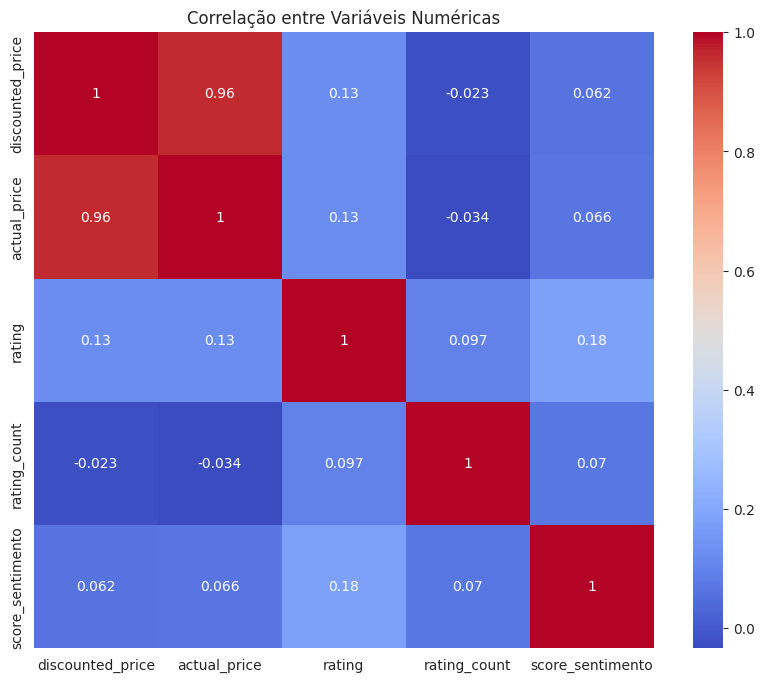

In [ ]:
# Heatmap de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df_merged[['discounted_price', 'actual_price', 'rating', 'rating_count','score_sentimento']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis Numéricas')
plt.show()

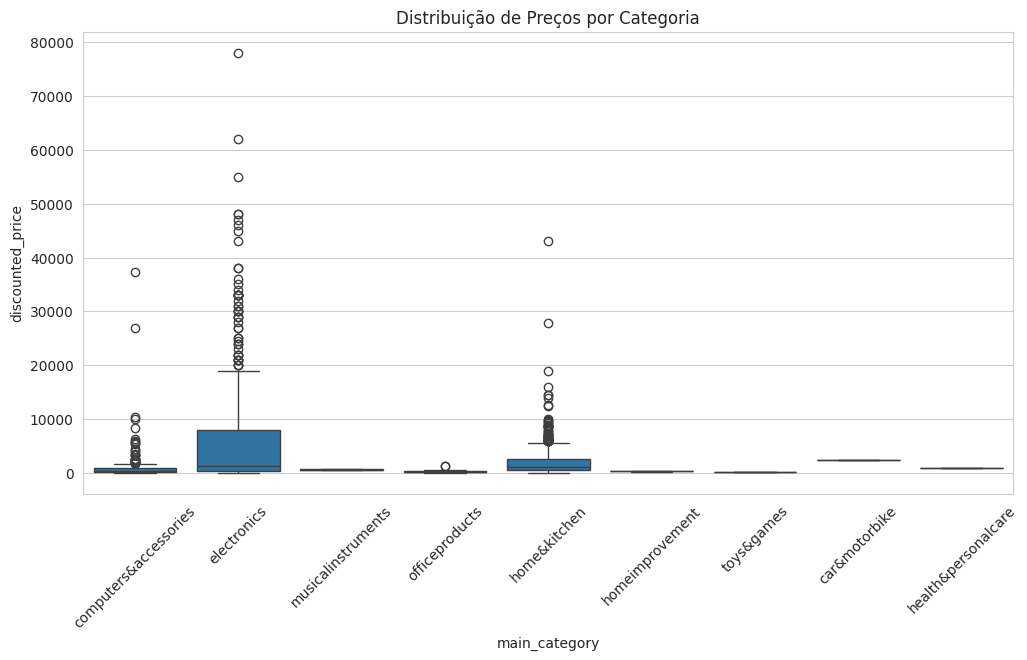

In [ ]:
# Boxplot de preços por categoria
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged, x='main_category', y='discounted_price')
plt.xticks(rotation=45)
plt.title('Distribuição de Preços por Categoria')
plt.show()

In [ ]:
# Criar feições de texto
df_review['tamanho_review'] = df_review['review_content'].str.len()
df_review['quantidade_palavras'] = df_review['review_content'].str.split().str.len()
df_review[['review_content', 'tamanho_review', 'quantidade_palavras']].head()

,review_content,tamanho_review,quantidade_palavras
46,good quality tool from d linkwifi signal is go...,483,88
143,i use this to connect an old pc to internet. i...,3989,678
721,"works good,bought it to replace my phillips qt...",1060,159
724,"liked this product,https://m.media-amazon.com/...",635,95
734,it's little small for big hands. but best avai...,1730,300


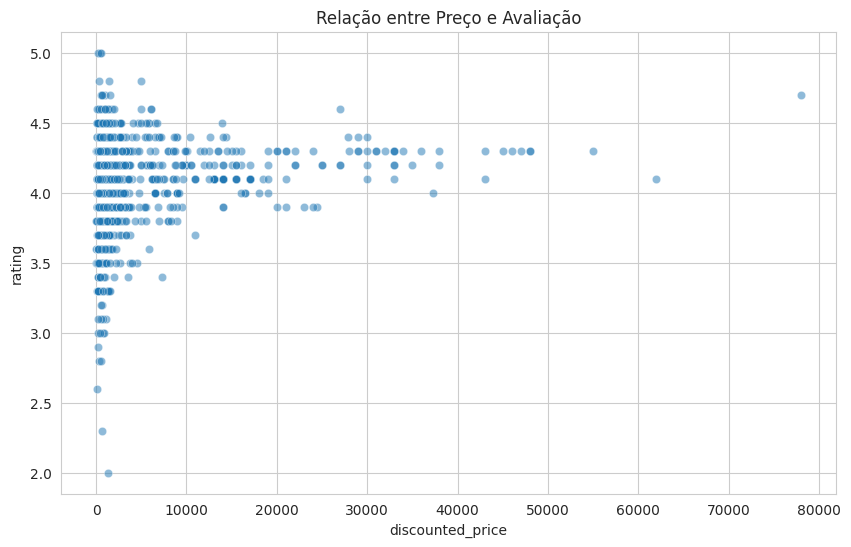

In [ ]:
# Scatter plot preço vs. rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='discounted_price', y='rating', alpha=0.5)
plt.title('Relação entre Preço e Avaliação')
plt.show()

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1349 non-null   object 
 1   product_name         1349 non-null   object 
 2   category             1349 non-null   object 
 3   discounted_price     1349 non-null   float64
 4   actual_price         1349 non-null   float64
 5   discount_percentage  1349 non-null   int64  
 6   about_product        1349 non-null   object 
 7   main_category        1349 non-null   object 
 8   produto              1349 non-null   object 
 9   preco_categoria      1349 non-null   object 
 10  user_id              1349 non-null   object 
 11  user_name            1349 non-null   object 
 12  review_id            1349 non-null   object 
 13  review_title         1349 non-null   object 
 14  review_content       1349 non-null   object 
 15  img_link             1349 non-null   o

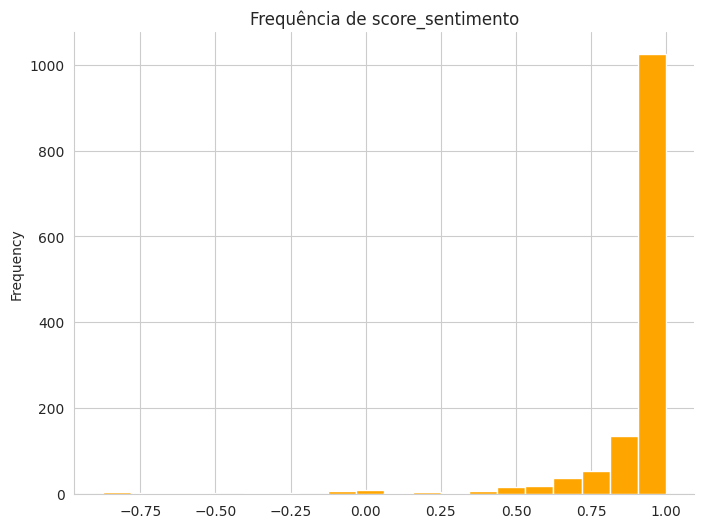

In [ ]:

from matplotlib import pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df_merged['score_sentimento'], bins=20, color='orange')
plt.title('Frequência de score_sentimento')
plt.ylabel('Frequency')  # Adiciona o rótulo "Frequency" no eixo y
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

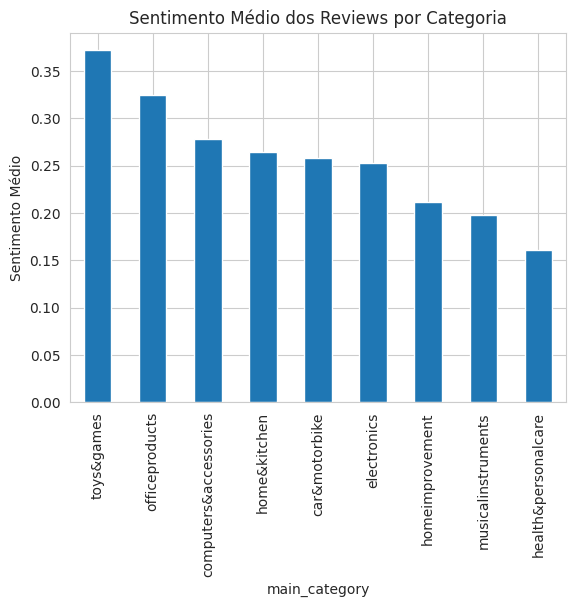

In [ ]:
# Análise de sentimento (usando biblioteca simples)
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

df_merged['sentiment'] = df_merged['review_content'].apply(get_sentiment)

# Média de sentimento por categoria
sentiment_by_category = df_merged.groupby('main_category')['sentiment'].mean().sort_values(ascending=False)
sentiment_by_category.plot(kind='bar')
plt.title('Sentimento Médio dos Reviews por Categoria')
plt.ylabel('Sentimento Médio')
plt.show()

In [ ]:
# Importar a biblioteca pandas
import pandas as pd

# Instalar a biblioteca openpyxl (necessária para arquivos .xlsx)
#!pip install openpyxl

# Supondo que seu DataFrame final se chame 'df_merged'
# Definir o nome do arquivo de saída
#nome_do_arquivo = 'amazon_final_limpo.xlsx'

# Salvar o DataFrame como um arquivo Excel
#df_merged.to_excel(nome_do_arquivo, index=False)

# Importar a função 'files' para download
#from google.colab import files

# Fornecer o link para download do arquivo
##files.download(nome_do_arquivo)

#print(f"O download do arquivo '{nome_do_arquivo}' será iniciado.")